___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
## Calling libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk import word_tokenize,pos_tag
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import plotly
from plotly import tools
init_notebook_mode(connected=True)
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer as TV
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report,cohen_kappa_score
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Load the dataset
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df_cl=df.copy()

### Data Wrangling

In [3]:
df_cl.shape

(23486, 11)

In [4]:
df_cl.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [5]:
df_cl.tail()

Unnamed: 0  Clothing ID  Age  \
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses

In [6]:
#type of variables
df_cl.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [7]:
df_cl['Review Text'][4]

'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!'

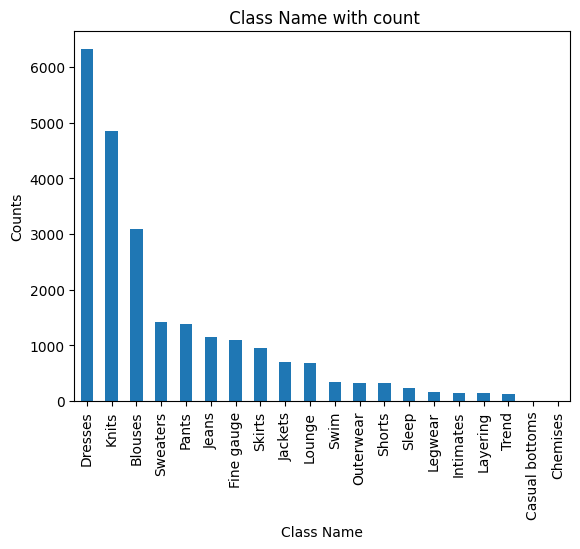

In [8]:
df_cl['Class Name'].value_counts().plot(kind='bar', title=' Class Name with count')
plt.xlabel("Class Name")
plt.ylabel("Counts")
plt.show()

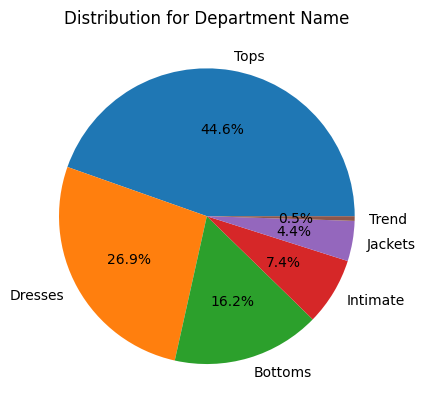

In [9]:
df_cl['Department Name'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution for Department Name')
plt.ylabel('')
plt.show()

The figure shows that the most reviews products are tops and dresses.

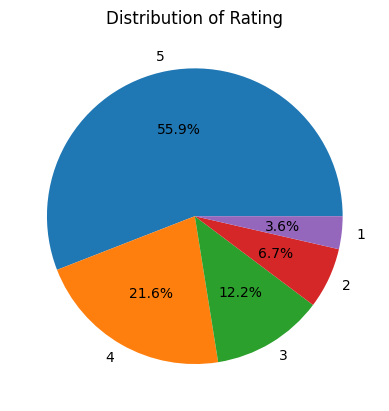

In [10]:
df_cl['Rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Rating")
plt.ylabel('')
plt.show()

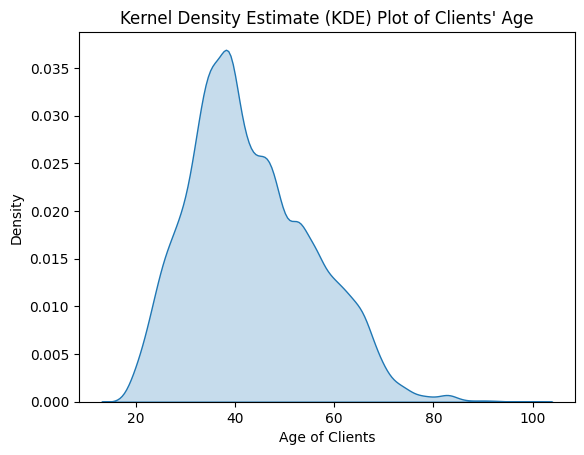

In [11]:
sns.kdeplot(data=df_cl, x='Age', fill=True)
plt.xlabel("Age of Clients")
plt.ylabel("Density")
plt.title("Kernel Density Estimate (KDE) Plot of Clients' Age")
plt.show()

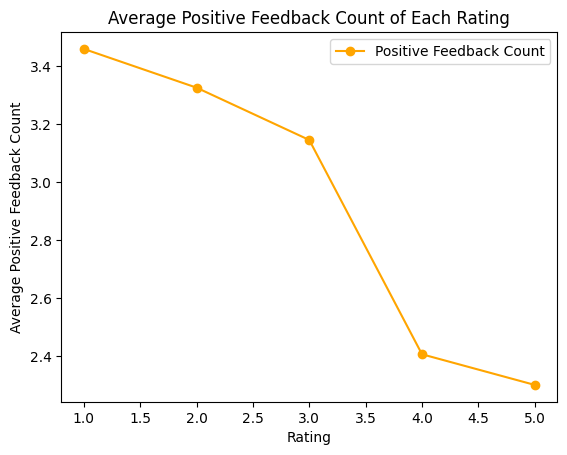

In [12]:
df_cl.groupby('Rating')[['Positive Feedback Count']].mean().sort_values('Rating', ascending=False).plot(kind='line',
                                                                                                        marker='o',
                                                                                                        color='orange')
plt.xlabel("Rating")
plt.ylabel("Average Positive Feedback Count")
plt.title("Average Positive Feedback Count of Each Rating")
plt.show()

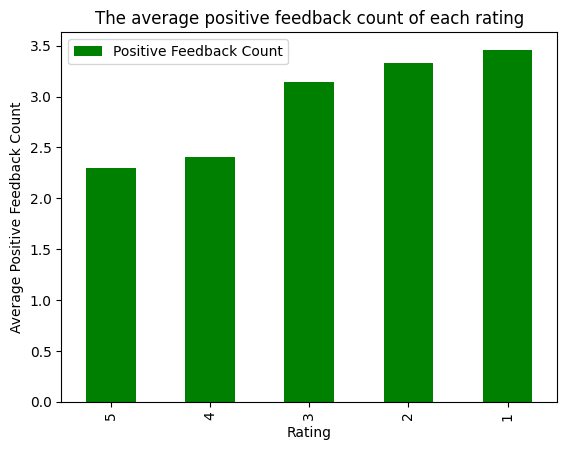

In [13]:
df_cl.groupby('Rating')[['Positive Feedback Count']].mean().sort_values('Rating', ascending=False).plot(kind='bar',
                                                                                                            color='green',
                                                                                                            title='The average positive feedback count of each rating')
plt.xlabel("Rating")
plt.ylabel("Average Positive Feedback Count")
plt.show()#shows the most products are recommended.

In [14]:
df_cl.describe()

Unnamed: 0   Clothing ID           Age        Rating  \
count  23486.000000  23486.000000  23486.000000  23486.000000   
mean   11742.500000    918.118709     43.198544      4.196032   
std     6779.968547    203.298980     12.279544      1.110031   
min        0.000000      0.000000     18.000000      1.000000   
25%     5871.250000    861.000000     34.000000      4.000000   
50%    11742.500000    936.000000     41.000000      5.000000   
75%    17613.750000   1078.000000     52.000000      5.000000   
max    23485.000000   1205.000000     99.000000      5.000000   

       Recommended IND  Positive Feedback Count  
count     23486.000000             23486.000000  
mean          0.822362                 2.535936  
std           0.382216                 5.702202  
min           0.000000                 0.000000  
25%           1.000000                 0.000000  
50%           1.000000                 1.000000  
75%           1.000000                 3.000000  
max           1.000000               122.000000

In [15]:
corr = df_cl.corr()


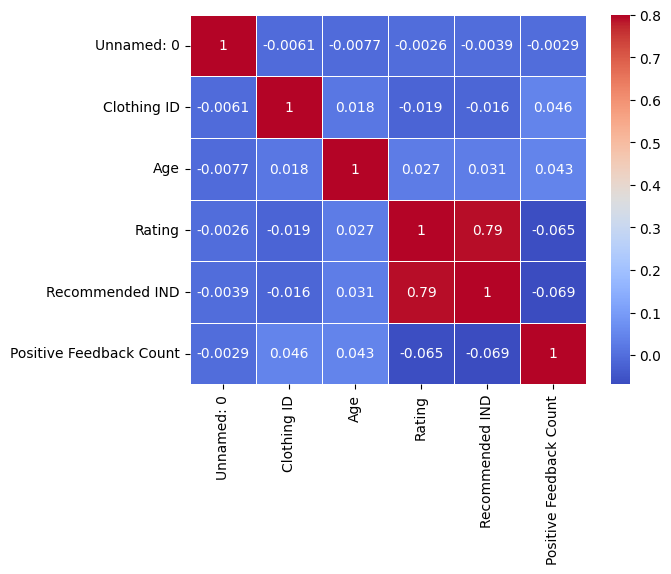

In [16]:
ax = sns.heatmap(corr, annot=True, linewidth=0.5, cmap='coolwarm', vmax=.8)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

plt.show()

In the above figure we can see that the variables are strongly correlated with themselves and there relationship  between Rating and Recommended variables.

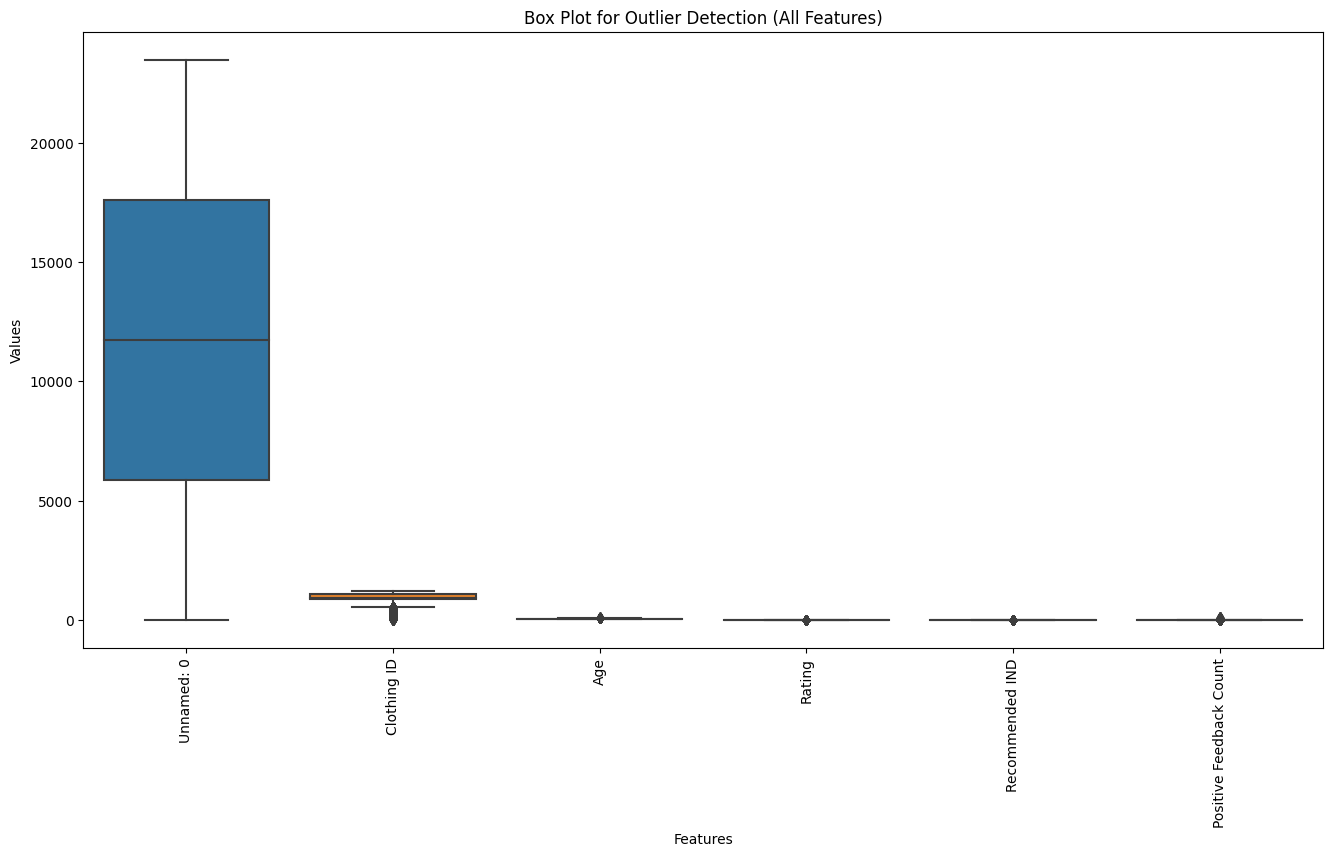

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 8))  # Increase the width and height values as desired
sns.boxplot(data=df_cl)
plt.xticks(rotation=90)
plt.title("Box Plot for Outlier Detection (All Features)")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

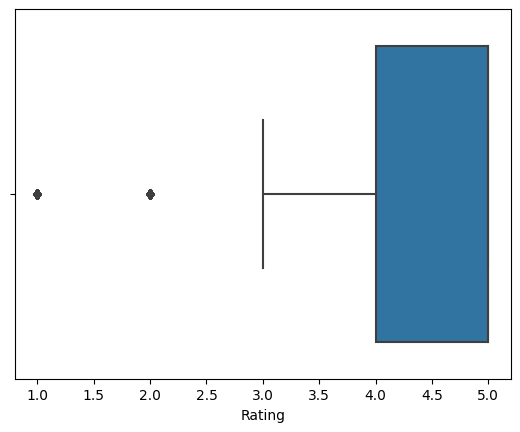

In [18]:
sns.boxplot(x=df_cl['Rating']);

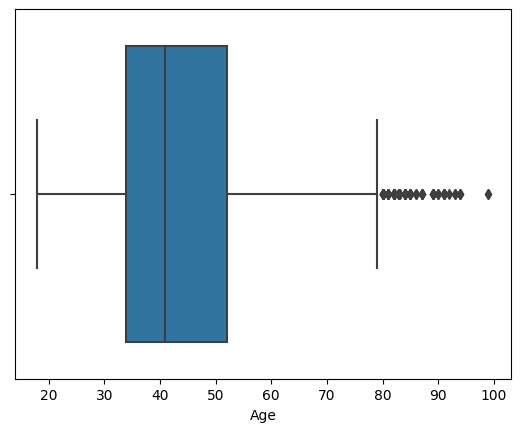

In [19]:
sns.boxplot(x=df_cl['Age']);

focus on finding reviews of products that are not recommended

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



In [20]:
df_cl_text = df_cl[['Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Age', 'Class Name', 'Department Name']]
df_cl_text.head()

Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count  Age Class Name Department Name  
0                        0   33  Intimates        Intimate  
1                        4   34    Dresses         Dresses  
2                        0   60    Dresses         Dresses  
3                        0   50      Pants         Bottoms  
4                        6   47    Blouses            Tops

i take the important feature  


i will change some columns name just for make it easy


In [21]:
df_cl_text = df_cl_text.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"})
df_cl_text.head()

Review  Rating  Recommended  \
0  Absolutely wonderful - silky and sexy and comf...       4            1   
1  Love this dress!  it's sooo pretty.  i happene...       5            1   
2  I had such high hopes for this dress and reall...       3            0   
3  I love, love, love this jumpsuit. it's fun, fl...       5            1   
4  This shirt is very flattering to all due to th...       5            1   

   Positive Feedback Count  Age Class Name Department Name  
0                        0   33  Intimates        Intimate  
1                        4   34    Dresses         Dresses  
2                        0   60    Dresses         Dresses  
3                        0   50      Pants         Bottoms  
4                        6   47    Blouses            Tops

### Missing Value Detection

In [22]:
df_cl_text.isnull().sum()

Review                     845
Rating                       0
Recommended                  0
Positive Feedback Count      0
Age                          0
Class Name                  14
Department Name             14
dtype: int64

In [23]:
df_cl_text.dropna(subset=['Review'], inplace=True)

-Apparently, the Count of Null values is small compared to the dataset size, So they are to be dropped.

In [24]:
df_cl_text.isnull().sum()

Review                      0
Rating                      0
Recommended                 0
Positive Feedback Count     0
Age                         0
Class Name                 13
Department Name            13
dtype: int64

# **Checking reviews length distribution:after drop the null **

In [25]:
column_names = df_cl_text.columns
print(column_names)

Index(['Review', 'Rating', 'Recommended', 'Positive Feedback Count', 'Age',
       'Class Name', 'Department Name'],
      dtype='object')


In [26]:
df_cl_text['Review_length'] = df_cl_text['Review'].apply(len)
df_cl_text.head()

Review  Rating  Recommended  \
0  Absolutely wonderful - silky and sexy and comf...       4            1   
1  Love this dress!  it's sooo pretty.  i happene...       5            1   
2  I had such high hopes for this dress and reall...       3            0   
3  I love, love, love this jumpsuit. it's fun, fl...       5            1   
4  This shirt is very flattering to all due to th...       5            1   

   Positive Feedback Count  Age Class Name Department Name  Review_length  
0                        0   33  Intimates        Intimate             53  
1                        4   34    Dresses         Dresses            303  
2                        0   60    Dresses         Dresses            500  
3                        0   50      Pants         Bottoms            124  
4                        6   47    Blouses            Tops            192

Text(0.5, 1.0, 'Histogram of review length')

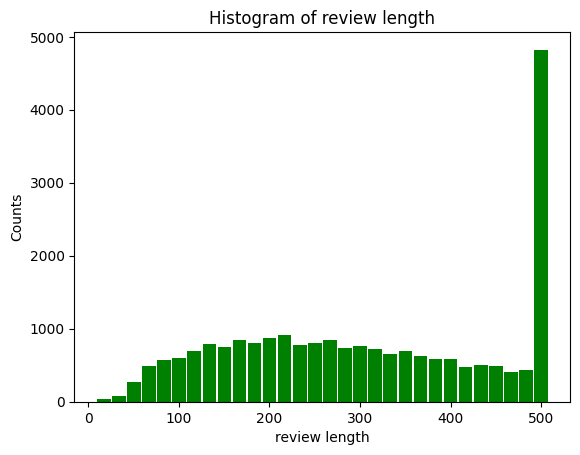

In [27]:
df_cl_text["Review_length"].plot(bins=30, rwidth=0.9, kind='hist', color="green")
plt.xlabel("review length")
plt.ylabel("Counts")
plt.title("Histogram of review length")

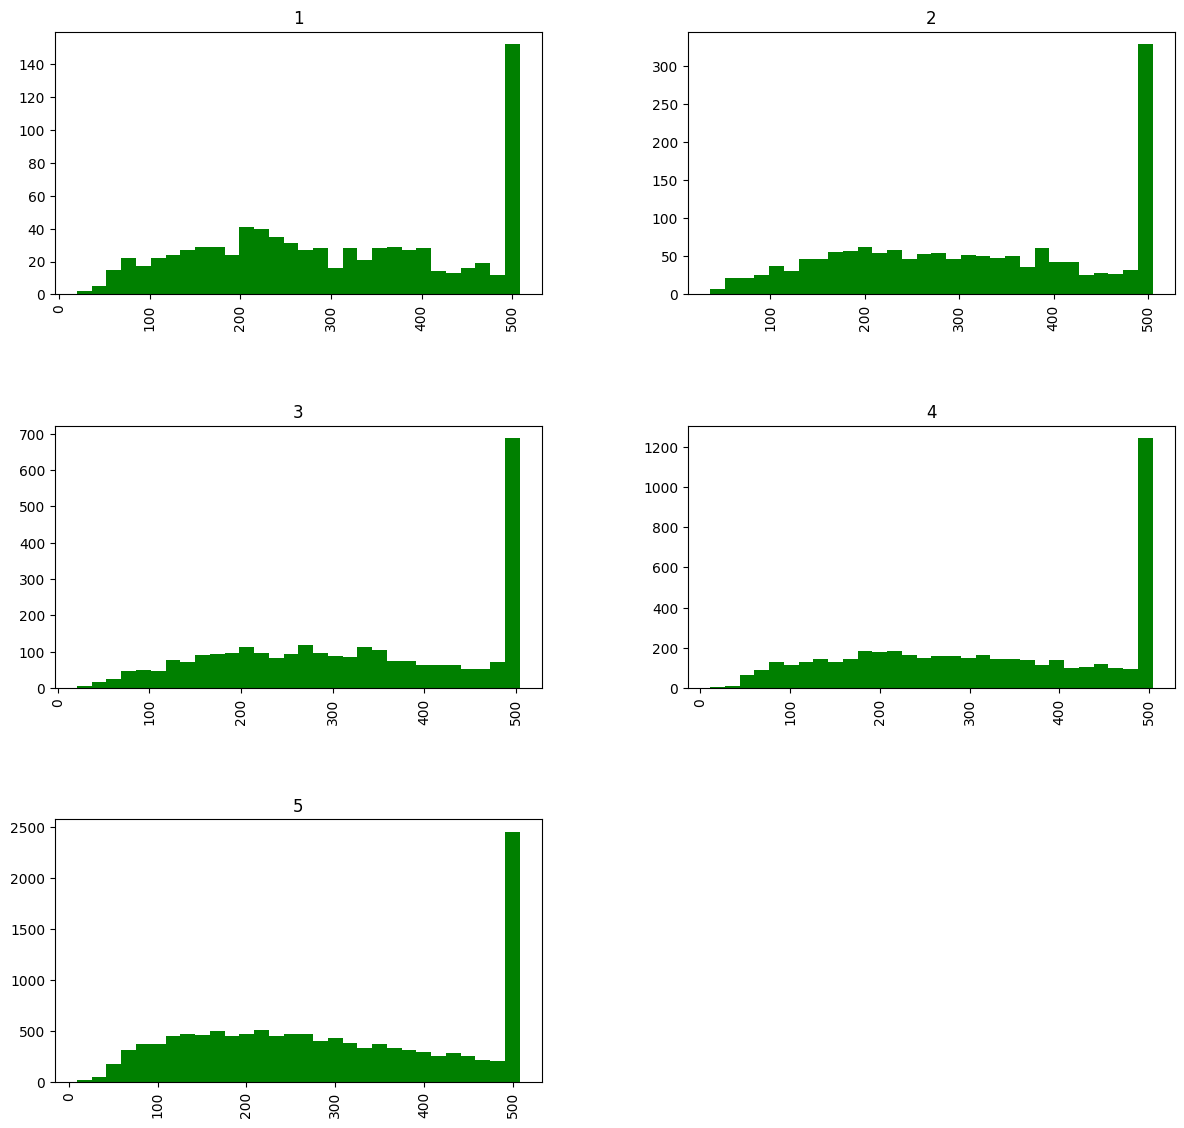

In [28]:
df_cl_text.hist(column='Review_length', by='Rating', bins=30,figsize=(14,14),color="green");

The figures shows that the most reviews length are more than 500 signs.

In [29]:
df_cl_text['Class Name'].where(df['Rating'] < 3).count()

2370

In [30]:
df_cl_text.groupby('Class Name')['Rating'].agg(max_rating='max', min_rating='min', average_rating='mean', total_rating='sum')

max_rating  min_rating  average_rating  total_rating
Class Name                                                          
Blouses                  5           1        4.142809         12358
Casual bottoms           4           4        4.000000             4
Chemises                 4           4        4.000000             4
Dresses                  5           1        4.138812         25433
Fine gauge               5           1        4.237960          4488
Intimates                5           1        4.278912           629
Jackets                  5           1        4.288433          2929
Jeans                    5           1        4.347826          4800
Knits                    5           1        4.145698         19178
Layering                 5           1        4.348485           574
Legwear                  5           1        4.246835           671
Lounge                   5           1        4.301943          2878
Outerwear                5           1        4.181818          1334
Pants                    5           1        4.261481          5753
Shorts                   5           1        4.253289          1293
Skirts                   5           1        4.229236          3819
Sleep                    5           1        4.294393           919
Sweaters                 5           1        4.168841          5753
Swim                     5           1        4.171687          1385
Trend                    5           1        3.838983           453

#### Check Proportion of Target Class Variable:

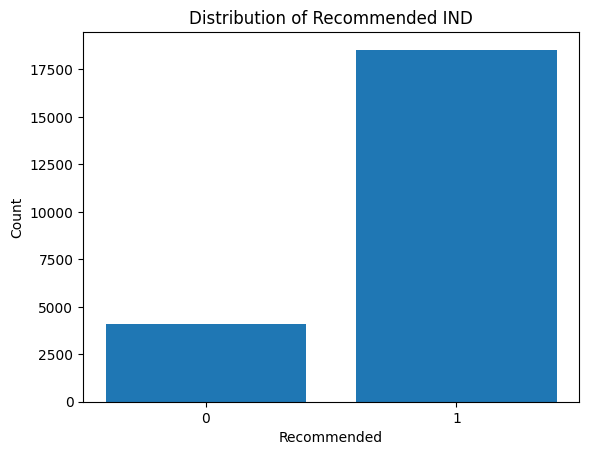

In [31]:

recommend_counts = df_cl_text["Recommended"].value_counts()

# Visualize the distribution
plt.bar(recommend_counts.index, recommend_counts.values)
plt.xlabel("Recommended")
plt.ylabel("Count")
plt.xticks(recommend_counts.index)
plt.title("Distribution of Recommended IND")
plt.show()

**The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".**

**unique value**

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [32]:
df_cl_text.nunique()

Review                     22634
Rating                         5
Recommended                    2
Positive Feedback Count       82
Age                           77
Class Name                    20
Department Name                6
Review_length                497
dtype: int64

In [33]:
df_cl_text['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [34]:
df_cl_text['Department Name'].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [35]:
df_cl_text['Rating'].value_counts()

5    12540
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

In [36]:
column_names = df_cl_text.columns
print(column_names)

Index(['Review', 'Rating', 'Recommended', 'Positive Feedback Count', 'Age',
       'Class Name', 'Department Name', 'Review_length'],
      dtype='object')


In [37]:
print(df_cl_text.columns)

Index(['Review', 'Rating', 'Recommended', 'Positive Feedback Count', 'Age',
       'Class Name', 'Department Name', 'Review_length'],
      dtype='object')


In [38]:
#checking for duplicated entries
duplicates = df_cl_text.duplicated().sum()
if  duplicates == 0:
    print("There are no duplicted rows in this data")
else:
    print('There are: ', str(duplicates), " duplicates")

There are:  3  duplicates


In [39]:
df_cl_text=df_cl_text.drop_duplicates()

In [40]:
df_cl_text.shape

(22638, 8)

In [41]:
df_cl_text.head()

Review  Rating  Recommended  \
0  Absolutely wonderful - silky and sexy and comf...       4            1   
1  Love this dress!  it's sooo pretty.  i happene...       5            1   
2  I had such high hopes for this dress and reall...       3            0   
3  I love, love, love this jumpsuit. it's fun, fl...       5            1   
4  This shirt is very flattering to all due to th...       5            1   

   Positive Feedback Count  Age Class Name Department Name  Review_length  
0                        0   33  Intimates        Intimate             53  
1                        4   34    Dresses         Dresses            303  
2                        0   60    Dresses         Dresses            500  
3                        0   50      Pants         Bottoms            124  
4                        6   47    Blouses            Tops            192

# **Again I will select the feature in the two important columns** to confirm the selection

In [42]:
d_M = df_cl_text.copy()

In [43]:
d_M = d_M.drop(['Rating', 'Positive Feedback Count', 'Age', 'Class Name', 'Department Name', 'Review_length'], axis=1)

In [44]:
d_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22638 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review       22638 non-null  object
 1   Recommended  22638 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


---
---


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [45]:
d_M.head()

Review  Recommended
0  Absolutely wonderful - silky and sexy and comf...            1
1  Love this dress!  it's sooo pretty.  i happene...            1
2  I had such high hopes for this dress and reall...            0
3  I love, love, love this jumpsuit. it's fun, fl...            1
4  This shirt is very flattering to all due to th...            1

In [46]:
stop_words = stopwords.words('english')

In [47]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords data if not already downloaded
nltk.download('stopwords')

# Create a set of stopwords
stop_words = set(stopwords.words('english'))

def cleaning(data):
    # 1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())

    # 2. Remove Punctuation
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    # 3. Remove Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    # 4. Lemmatize
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    # Join the cleaned tokens
    return " ".join(text_cleaned)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
nltk.download('punkt')
import nltk


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [49]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [50]:
d_M["Review"] = d_M["Review"].apply(cleaning)
d_M["Review"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review, dtype: object

In [51]:
" ".join(d_M["Review"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 's

In [52]:
threshold = 5
word_counts = pd.Series(" ".join(d_M["Review"]).split()).value_counts()
rare_words = word_counts[word_counts < threshold]
rare_words

elasticity     4
deliciously    4
rarity         4
peeked         4
reaction       4
              ..
particle       1
deposited      1
sof            1
nerdy          1
platinum       1
Length: 7817, dtype: int64

In [53]:
rare_words = rare_words[rare_words <= 2]

In [54]:
rare_words.index

Index(['gorge', 'dread', 'doe', 'melodist', 'cutie', 'flatte', 'noticing',
       'clashed', 'looove', 'agin',
       ...
       'mosly', 'retailerday', 'encouraging', 'hahahaha', 'gasped', 'particle',
       'deposited', 'sof', 'nerdy', 'platinum'],
      dtype='object', length=6497)

In [55]:
d_M["Review"] = d_M["Review"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
d_M["Review"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [56]:
d_M[d_M["Recommended"] == 0].head(3)

Review  Recommended
2   high hope dress really wanted work initially o...            0
5   love tracy reese dress one petite foot tall us...            0
10  dress run small esp zipper area run ordered sp...            0

In [57]:
d_M[d_M["Recommended"] == 1].head(3)

Review  Recommended
0        absolutely wonderful silky sexy comfortable            1
1  love dress sooo pretty happened find store im ...            1
3  love love love jumpsuit fun flirty fabulous ev...            1

### Collect Words (positive and negative separately)

In [58]:
" ".join(d_M["Review"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flatteri

In [59]:
pos_wo = " ".join(d_M[d_M["Recommended"] == 1]["Review"]).split()


In [60]:
pos_wo

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'trying',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'size',
 'bummer',
 'petite',
 'decided',
 'though',
 'said',
 'everything',
 '

In [61]:
neg_wo = " ".join(d_M[d_M["Recommended"] == 0]["Review"]).split()
neg_wo

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typically',
 'fit',
 'tight',
 'material',

to know how many number of words

In [62]:


print(f"Number of words in pos_wo: {len(pos_wo)}")
print(f"Number of words in neg_wo: {len(neg_wo)}")


Number of words in pos_wo: 516752
Number of words in neg_wo: 116488


### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [63]:
rev_tx = d_M["Review"]

In [64]:
all_words = " ".join(rev_tx)

In [65]:
all_words[:150]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite l'

In [66]:

from wordcloud import WordCloud  # Import the WordCloud class

# Rest of your WordCloud visualization code goes here


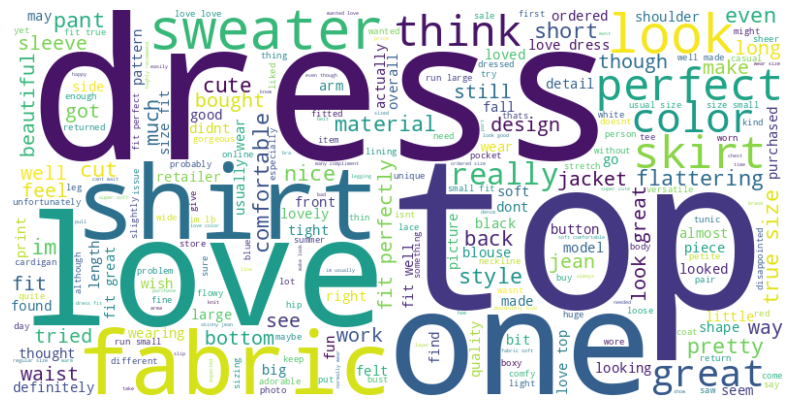

In [67]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=250,
    colormap="viridis"
).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

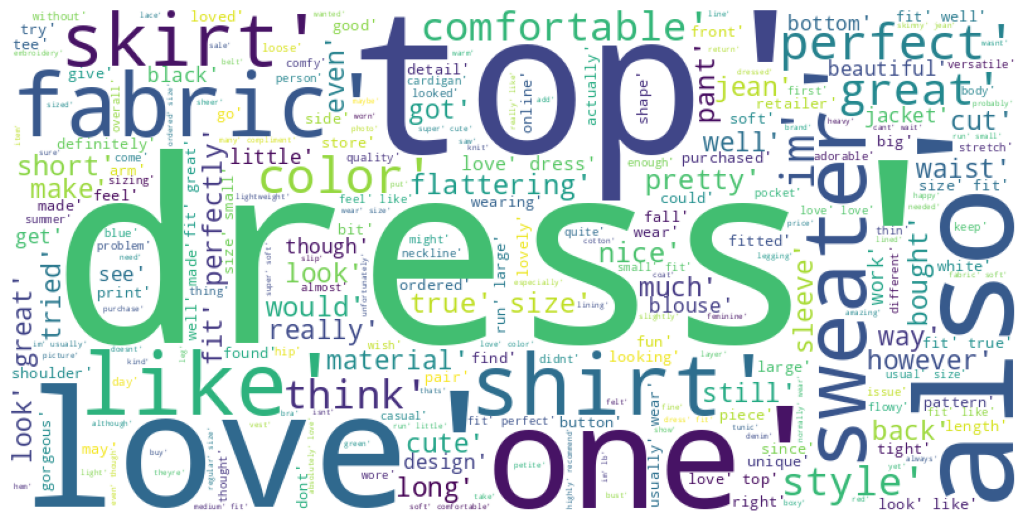

In [68]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(pos_wo))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

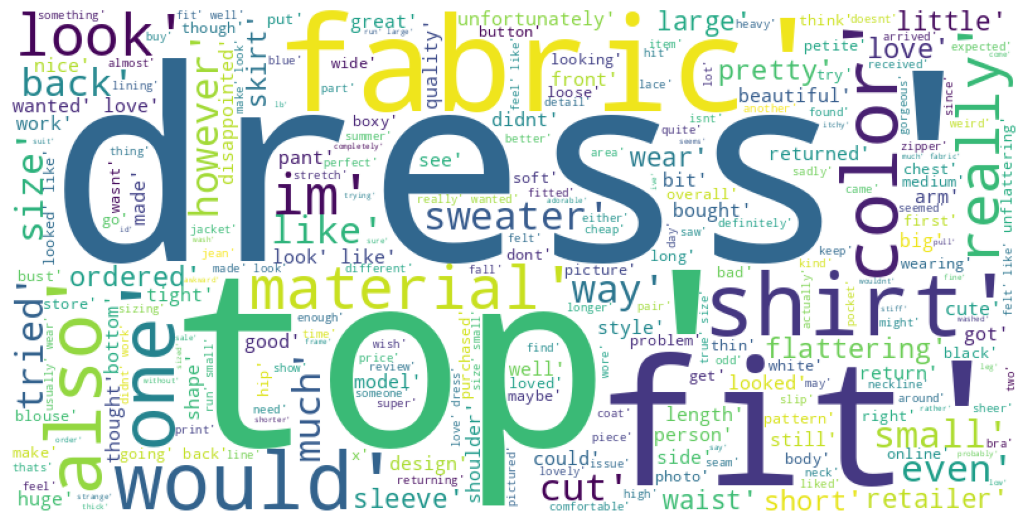

In [69]:

wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(neg_wo))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [70]:
from collections import Counter  # Import the Counter class


CounterA = Counter(word_tokenize(all_words))
most_common_words = CounterA.most_common(60)

print(most_common_words)


[('dress', 11352), ('fit', 10126), ('size', 9362), ('love', 8989), ('top', 8281), ('like', 7035), ('color', 6916), ('look', 6891), ('wear', 6520), ('great', 6100), ('im', 5968), ('would', 5013), ('fabric', 4862), ('small', 4589), ('really', 3924), ('ordered', 3833), ('little', 3773), ('perfect', 3759), ('one', 3704), ('flattering', 3485), ('soft', 3321), ('well', 3251), ('back', 3186), ('comfortable', 3047), ('cute', 3030), ('nice', 3017), ('bought', 2985), ('beautiful', 2950), ('bit', 2877), ('material', 2811), ('large', 2791), ('shirt', 2790), ('much', 2703), ('sweater', 2700), ('length', 2638), ('run', 2631), ('jean', 2598), ('also', 2583), ('work', 2527), ('petite', 2430), ('got', 2426), ('long', 2400), ('short', 2360), ('waist', 2306), ('quality', 2259), ('medium', 2233), ('skirt', 2220), ('think', 2194), ('pretty', 2188), ('even', 2166), ('retailer', 2156), ('x', 2113), ('make', 2095), ('feel', 2084), ('tried', 2082), ('pant', 2063), ('store', 2049), ('usually', 2009), ('get', 20

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [71]:
X = d_M["Review"].values
y = d_M["Recommended"].map({0:1, 1:0}).values


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)

X_train_co = vectorizer.fit_transform(X_train)
X_test_co = vectorizer.transform(X_test)

In [75]:
X_train_co

<18110x4926 sparse matrix of type '<class 'numpy.int64'>'
	with 458057 stored elements in Compressed Sparse Row format>

In [76]:
X_test_co

<4528x4926 sparse matrix of type '<class 'numpy.int64'>'
	with 113384 stored elements in Compressed Sparse Row format>

In [77]:

num_rows = len(X_train_co.toarray())
print(f"Number of rows in X_train_co: {num_rows}")
X_train_co.toarray()

Number of rows in X_train_co: 18110


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [78]:
X_train_co.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [79]:
pd.DataFrame(X_train_co.toarray(), columns = vectorizer.get_feature_names_out())

ab  abby  abdomen  ability  able  abo  absolute  absolutely  abstract  \
0       0     0        0        0     0    0         0           0         0   
1       0     0        0        0     0    0         0           0         0   
2       0     0        0        0     0    0         0           0         0   
3       0     0        0        0     0    0         0           0         0   
4       0     0        0        0     0    0         0           0         0   
...    ..   ...      ...      ...   ...  ...       ...         ...       ...   
18105   0     0        0        0     0    0         0           0         0   
18106   0     0        0        0     0    0         0           0         0   
18107   0     0        0        0     0    0         0           0         0   
18108   0     0        0        0     0    0         0           1         0   
18109   0     0        0        0     0    0         0           0         0   

       absurd  ...  zero  zig  zigzag  zip  zipped  zipper  zippered  zipping  \
0           0  ...     0    0       0    0       0       0         0        0   
1           0  ...     0    0       0    1       0       0         0        0   
2           0  ...     0    0       0    0       0       0         0        0   
3           0  ...     0    0       0    0       0       0         0        0   
4           0  ...     0    0       0    0       0       0         0        0   
...       ...  ...   ...  ...     ...  ...     ...     ...       ...      ...   
18105       0  ...     0    0       0    0       0       0         0        0   
18106       0  ...     0    0       0    0       1       0         0        0   
18107       0  ...     0    0       0    0       0       0         0        0   
18108       0  ...     0    0       0    0       0       0         0        0   
18109       0  ...     0    0       0    0       0       0         0        0   

       zone  zoom  
0         0     0  
1         0     0  
2         0     0  
3         0     0  
4         0     0  
...     ...   ...  
18105     0     0  
18106     0     0  
18107     0     0  
18108     0     0  
18109     0     0  

[18110 rows x 4926 columns]

### TF-IDF

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vec = TfidfVectorizer(preprocessor=cleaning, min_df=3)

X_train_tf_idf = tf_idf_vec.fit_transform(X_train)
X_test_tf_idf = tf_idf_vec.transform(X_test)

In [81]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vec.get_feature_names_out())

ab  abby  abdomen  ability  able  abo  absolute  absolutely  abstract  \
0      0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   
1      0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   
2      0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   
3      0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   
4      0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   
...    ...   ...      ...      ...   ...  ...       ...         ...       ...   
18105  0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   
18106  0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   
18107  0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   
18108  0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.293955       0.0   
18109  0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   

       absurd  ...  zero  zig  zigzag       zip   zipped  zipper  zippered  \
0         0.0  ...   0.0  0.0     0.0  0.000000  0.00000     0.0       0.0   
1         0.0  ...   0.0  0.0     0.0  0.175782  0.00000     0.0       0.0   
2         0.0  ...   0.0  0.0     0.0  0.000000  0.00000     0.0       0.0   
3         0.0  ...   0.0  0.0     0.0  0.000000  0.00000     0.0       0.0   
4         0.0  ...   0.0  0.0     0.0  0.000000  0.00000     0.0       0.0   
...       ...  ...   ...  ...     ...       ...      ...     ...       ...   
18105     0.0  ...   0.0  0.0     0.0  0.000000  0.00000     0.0       0.0   
18106     0.0  ...   0.0  0.0     0.0  0.000000  0.39152     0.0       0.0   
18107     0.0  ...   0.0  0.0     0.0  0.000000  0.00000     0.0       0.0   
18108     0.0  ...   0.0  0.0     0.0  0.000000  0.00000     0.0       0.0   
18109     0.0  ...   0.0  0.0     0.0  0.000000  0.00000     0.0       0.0   

       zipping  zone  zoom  
0          0.0   0.0   0.0  
1          0.0   0.0   0.0  
2          0.0   0.0   0.0  
3          0.0   0.0   0.0  
4          0.0   0.0   0.0  
...        ...   ...   ...  
18105      0.0   0.0   0.0  
18106      0.0   0.0   0.0  
18107      0.0   0.0   0.0  
18108      0.0   0.0   0.0  
18109      0.0   0.0   0.0  

[18110 rows x 4926 columns]

### Eval Function

In [83]:
from sklearn.metrics import mean_absolute_percentage_error

In [84]:
pip install scikit-plot


In [85]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
from scikitplot.metrics import plot_precision_recall
from yellowbrick.classifier import PrecisionRecallCurve

def evelll(model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Calculate confusion matrices for test and training sets
    cm = confusion_matrix(y_test, y_pred)
    cm_train = confusion_matrix(y_train, y_pred_train)

    # Plot the confusion matrix for the test set
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Confusion Matrix (Test Set)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # Annotate the plot with values
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f'{cm[i, j]}\n({cm[i, j] / np.sum(cm[i]) * 100:.2f}%)', ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.show()

    # Plot the confusion matrix for the training set
    plt.figure(figsize=(8, 6))
    plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Confusion Matrix (Training Set)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # Annotate the plot with values
    thresh = cm_train.max() / 2
    for i in range(cm_train.shape[0]):
        for j in range(cm_train.shape[1]):
            plt.text(j, i, f'{cm_train[i, j]}\n({cm_train[i, j] / np.sum(cm_train[i]) * 100:.2f}%)',
                     ha="center", va="center", color="white" if cm_train[i, j] > thresh else "black")

    plt.show()

    print("Test Set")
    print("Confusion Matrix:")
    print(cm)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Train Set")
    print("Confusion Matrix (Training Set):")
    print(cm_train)

    print("Classification Report (Training Set):")
    print(classification_report(y_train, y_pred_train))

    # Plot Precision-Recall curve using Yellowbrick
    viz = PrecisionRecallCurve(
        model,
        classes=model.classes_,
        per_class=True,
        cmap="Set1"
    )

    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    ax.set_facecolor('#eafff5')

    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()

    # Plot Precision-Recall curve using scikit-plot
    plt.figure(figsize=(8, 6))
    plot_precision_recall(y_test, model.predict_proba(X_test))
    plt.title("Precision-Recall Curve")
    plt.show()


## Logistic Regression

### CountVectorizer

In [86]:
from sklearn.linear_model import LogisticRegression

logreg_count = LogisticRegression( max_iter = 1000, class_weight = 'balanced', random_state = 42)
logreg_count.fit(X_train_co,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

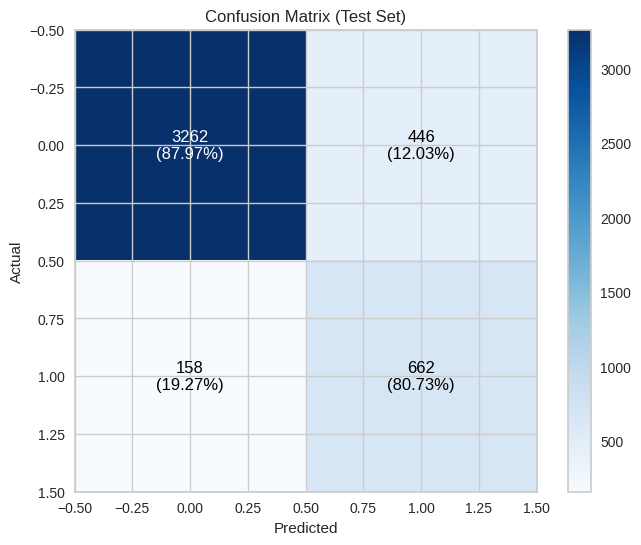

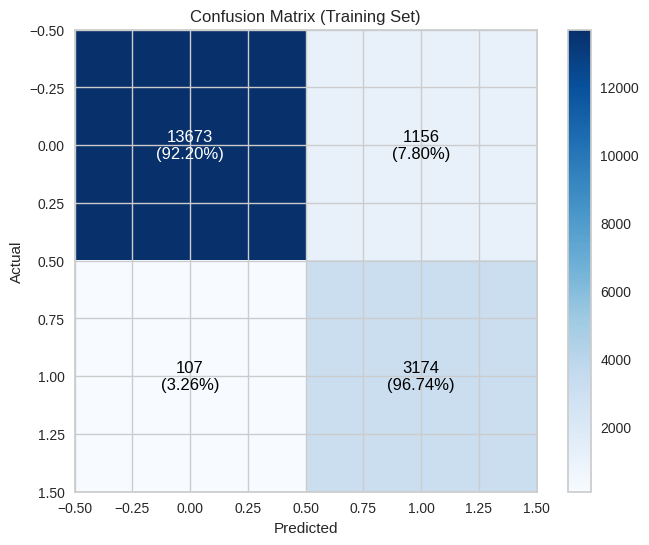

Test Set
Confusion Matrix:
[[3262  446]
 [ 158  662]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      3708
           1       0.60      0.81      0.69       820

    accuracy                           0.87      4528
   macro avg       0.78      0.84      0.80      4528
weighted avg       0.89      0.87      0.87      4528

Train Set
Confusion Matrix (Training Set):
[[13673  1156]
 [  107  3174]]
Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     14829
           1       0.73      0.97      0.83      3281

    accuracy                           0.93     18110
   macro avg       0.86      0.94      0.89     18110
weighted avg       0.95      0.93      0.93     18110



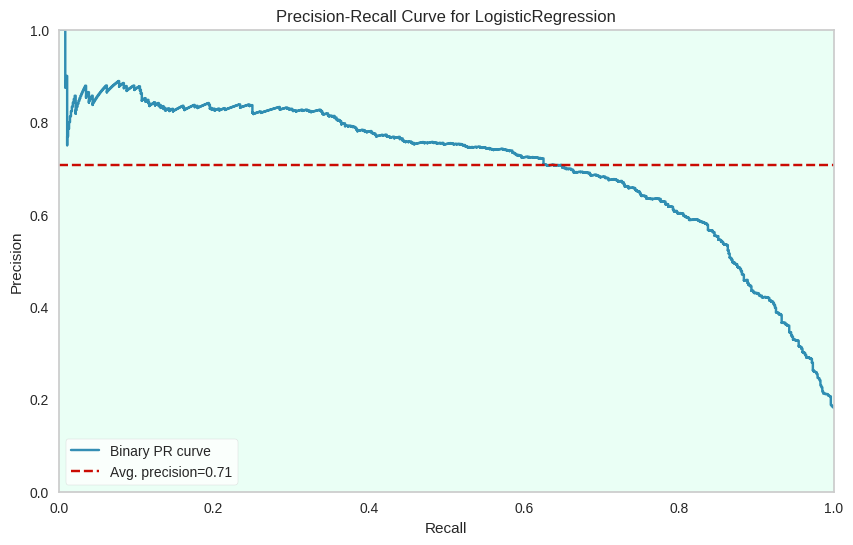

<Figure size 800x600 with 0 Axes>

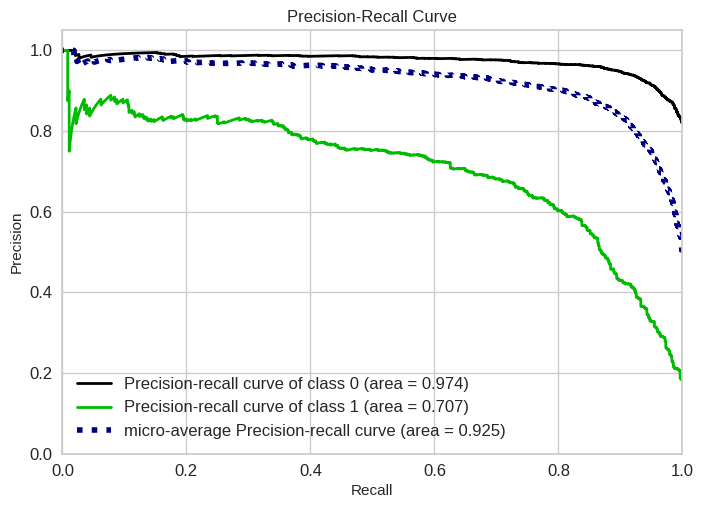

In [87]:
evelll(logreg_count, X_train_co, X_test_co, y_train, y_test)

the model performs well on the training set, achieving high precision, recall, and F1-score for both classes. it exhibits lower precision, recall, and F1-score for the negative class (class 1). This suggests that the model might generalize well on the training set but struggles to perform as effectively on unseen data, particularly in correctly identifying instances

In [88]:
from sklearn.metrics import recall_score, f1_score, average_precision_score

# Calculate recall, F1-score, and average precision (AP)
y_pred = logreg_count.predict(X_test_co)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test, y_pred)
log_AP = average_precision_score(y_test, logreg_count.predict_proba(X_test_co)[:, 1])

# Print the results
print("LogReg_Count_rec : ", log_count_rec)
print("LogReg_Count_f1  : ", log_count_f1)
print("LogReg_Count_AP  : ", log_AP)


LogReg_Count_rec :  0.8073170731707318
LogReg_Count_f1  :  0.6867219917012448
LogReg_Count_AP  :  0.7069918939981968


In [89]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Define custom scorers
custom_scorer = {
    'accuracyg': make_scorer(accuracy_score),
    'precision-0g': make_scorer(precision_score, pos_label=0),
    'recall-0g': make_scorer(recall_score, pos_label=0),
    'f1-0g': make_scorer(f1_score, pos_label=0),
    'precision-1g': make_scorer(precision_score, pos_label=1),
    'recall-1g': make_scorer(recall_score, pos_label=1),
    'f1-1g': make_scorer(f1_score, pos_label=1)
}

# Initialize Logistic Regression model
model1 = LogisticRegression(C=0.1, max_iter=1000, class_weight="balanced", random_state=42)

# Store the results in a dictionary
results = {}

# Perform cross-validation for each custom scorer
for metric, scorer in custom_scorer.items():
    scores = cross_val_score(model1, X_train_co, y_train, cv=10, scoring=scorer)
    mean_score = scores.mean()
    results[metric] = mean_score

# Print the results
for metric, score in results.items():
    print(f"{metric:20} score for LogReg_Count: {score}\n")


accuracyg            score for LogReg_Count: 0.8639977912755384

precision-0g         score for LogReg_Count: 0.9580416932282759

recall-0g            score for LogReg_Count: 0.8721427186930967

f1-0g                score for LogReg_Count: 0.9130495569987851

precision-1g         score for LogReg_Count: 0.5889239180347623

recall-1g            score for LogReg_Count: 0.8271832604344279

f1-1g                score for LogReg_Count: 0.6878378805207632



### TF-IDF

In [90]:
logreg_tf = LogisticRegression(max_iter = 1000, class_weight = "balanced", random_state = 42)
logreg_tf.fit(X_train_tf_idf,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

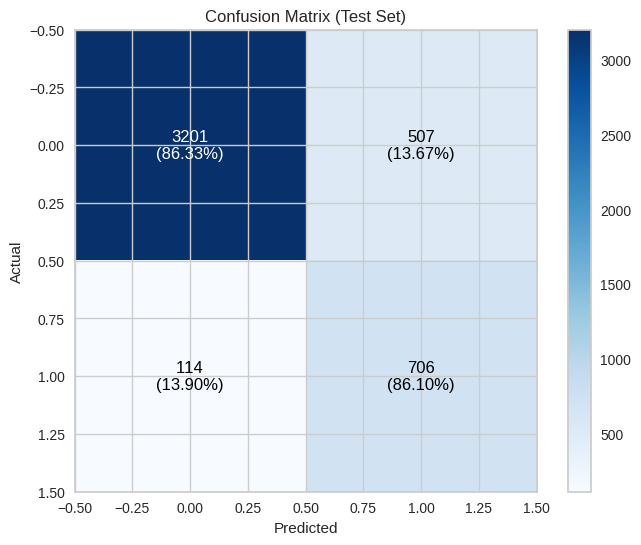

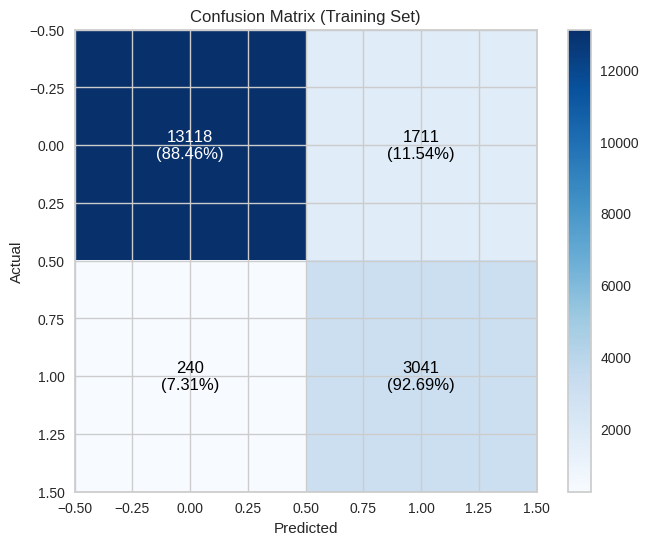

Test Set
Confusion Matrix:
[[3201  507]
 [ 114  706]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3708
           1       0.58      0.86      0.69       820

    accuracy                           0.86      4528
   macro avg       0.77      0.86      0.80      4528
weighted avg       0.90      0.86      0.87      4528

Train Set
Confusion Matrix (Training Set):
[[13118  1711]
 [  240  3041]]
Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     14829
           1       0.64      0.93      0.76      3281

    accuracy                           0.89     18110
   macro avg       0.81      0.91      0.84     18110
weighted avg       0.92      0.89      0.90     18110



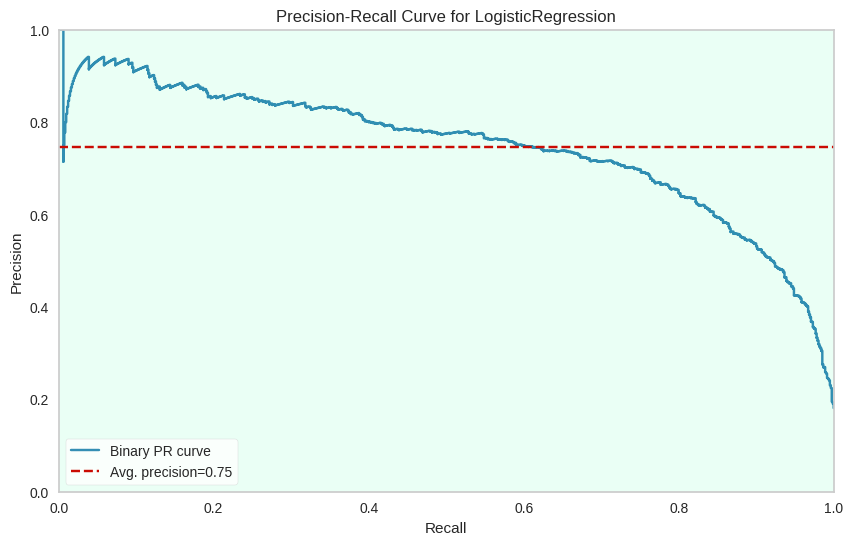

<Figure size 800x600 with 0 Axes>

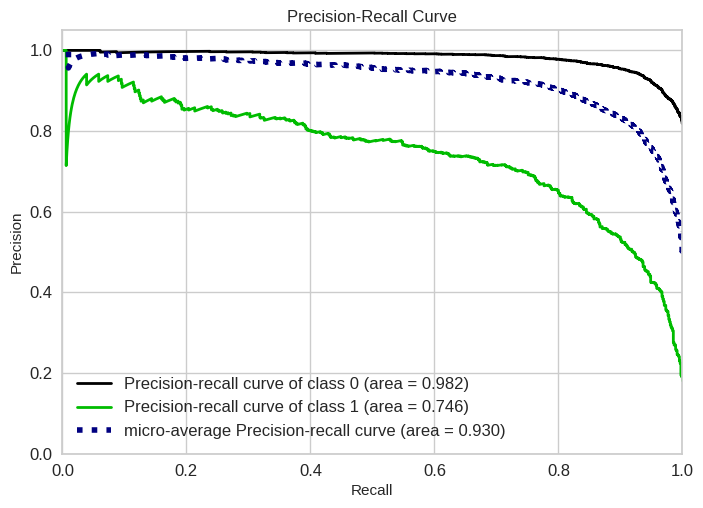

In [91]:
evelll(logreg_tf, X_train_tf_idf, X_test_tf_idf, y_train, y_test)

Test Set:

The model has an accuracy of 86% on the test set.
It performs well in identifying the positive class (class 0) with high precision and recall.
However, it struggles more with the negative class (class 1), showing lower precision, recall, and F1-score.
Train Set:

On the training set, the model has a higher accuracy of 89%.
It exhibits good performance for both classes, with high precision, recall, and F1-score for the negative class.
Conclusion:

The model generalizes reasonably well from the training set to the test set, but there is room for improvement, especially in correctly identifying instances of the negative class on the test set.
Further fine-tuning, feature engineering, or exploring different model architectures may be considered to enhance the model's performance, especially in scenarios where identifying the negative class is crucial.

In [92]:

from sklearn.metrics import recall_score, f1_score, average_precision_score

# Calculate recall, F1-score, and average precision (AP)
y_pred = logreg_tf.predict(X_test_tf_idf)
log_tf_idf_rec = recall_score(y_test, y_pred )
log_tf_idf_f1 = f1_score(y_test, y_pred )
log_tf_idf_AP = average_precision_score(y_test, logreg_tf.predict_proba(X_test_tf_idf)[:, 1])

# Print the results
print("log_tf_idf_rec : ", log_tf_idf_rec)
print("log_tf_idf_f1  : ", log_tf_idf_f1)
print("log_tf_idf_AP  : ", log_tf_idf_AP)


log_tf_idf_rec :  0.8609756097560975
log_tf_idf_f1  :  0.6945400885391048
log_tf_idf_AP  :  0.7464379801417594


In [93]:
custom_scorer = {'accuracyT': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C = 1, max_iter = 1000, random_state = 101, class_weight = "balanced")
    scores = cross_val_score(logreg_tf, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    print(f" {i:20} score for logreg_tf : {scores}\n")

 accuracyT            score for logreg_tf : 0.863390392048592

 precision-0          score for logreg_tf : 0.9614250714780066

 recall-0             score for logreg_tf : 0.8680288888100224

 f1-0                 score for logreg_tf : 0.912322930764326

 precision-1          score for logreg_tf : 0.5855432184962479

 recall-1             score for logreg_tf : 0.8424216027874565

 f1-1                 score for logreg_tf : 0.6907621706498912



## Naive Bayes

### Countvectorizer

In [94]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
#I will applay Countvectorizer in both MultinomialNB, BernoulliNB

In [95]:
nb_count = MultinomialNB()
nb_count.fit(X_train_co,y_train)

MultinomialNB()

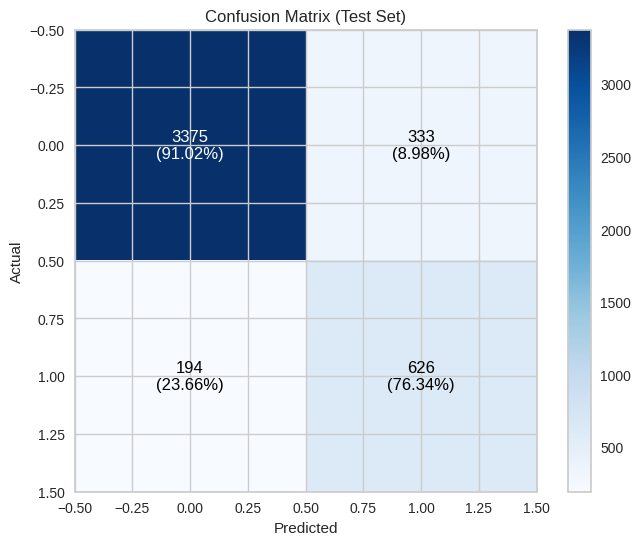

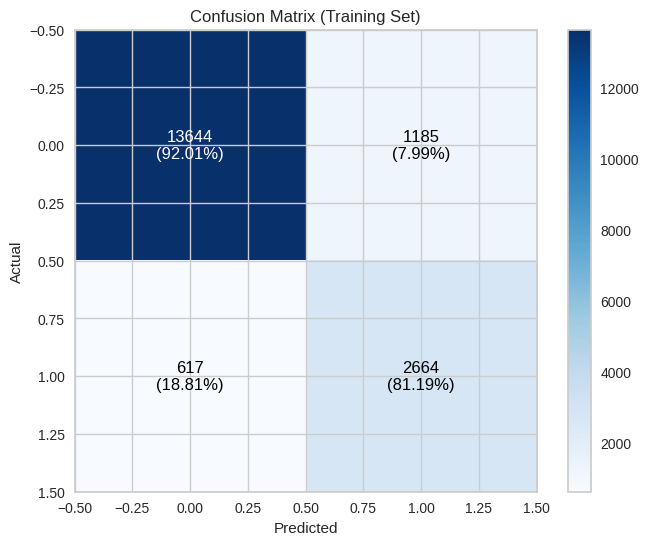

Test Set
Confusion Matrix:
[[3375  333]
 [ 194  626]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3708
           1       0.65      0.76      0.70       820

    accuracy                           0.88      4528
   macro avg       0.80      0.84      0.82      4528
weighted avg       0.89      0.88      0.89      4528

Train Set
Confusion Matrix (Training Set):
[[13644  1185]
 [  617  2664]]
Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14829
           1       0.69      0.81      0.75      3281

    accuracy                           0.90     18110
   macro avg       0.82      0.87      0.84     18110
weighted avg       0.91      0.90      0.90     18110



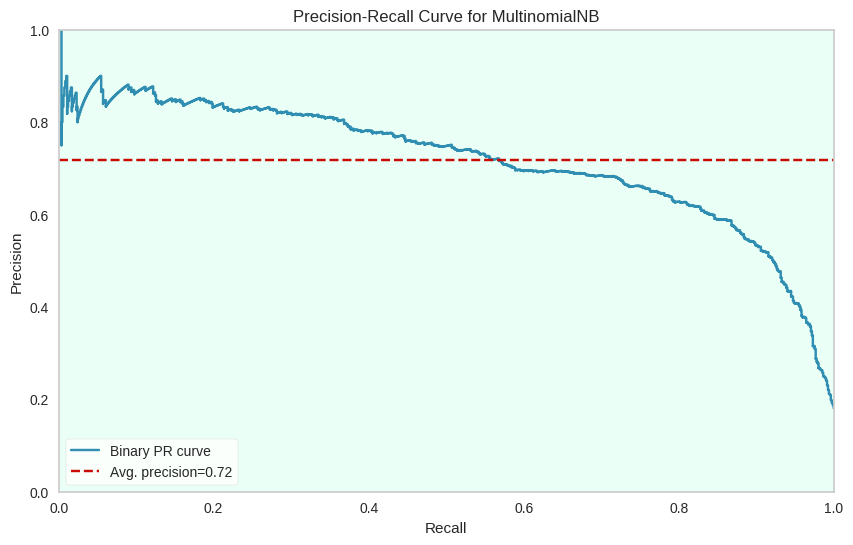

<Figure size 800x600 with 0 Axes>

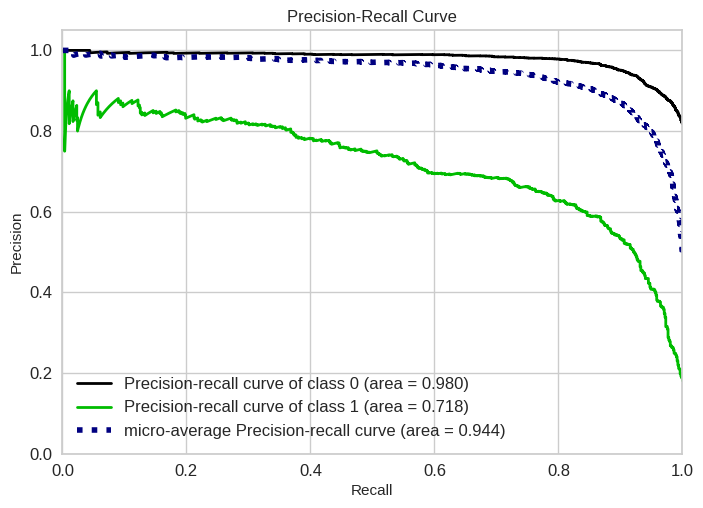

In [96]:
evelll(nb_count, X_train_co, X_test_co, y_train, y_test)

The model generalizes reasonably well from the training set to the test set, but there is still room for improvement, especially in correctly identifying instances of the negative class on the test set.
Further fine-tuning, feature engineering, or exploring different model architectures may be considered to enhance the model's performance, particularly in scenarios where identifying the negative class is crucial.

In [97]:
y_pred = nb_count.predict(X_test_co)
nnb_count_rec = recall_score(y_test, y_pred)
nb_countt_f1 = f1_score(y_test, y_pred)
nb_count_AP =  average_precision_score(y_test, nb_count.predict_proba(X_test_co)[:, 1])

print("nnb_count_rec : ", nnb_count_rec)
print("nb_countt_f1  : ", nb_countt_f1)
print("nb_count_AP  : ", nb_count_AP)

nnb_count_rec :  0.7634146341463415
nb_countt_f1  :  0.7037661607644743
nb_count_AP  :  0.7176232800268283


In [98]:
custom_scorer = {'accuracynb': make_scorer(accuracy_score),
                 'precision-0nb': make_scorer(precision_score, pos_label=0),
                 'recall-0nb': make_scorer(recall_score, pos_label=0),
                 'f1-0nb': make_scorer(f1_score, pos_label=0),
                 'precision-1nb': make_scorer(precision_score, pos_label=1),
                 'recall-1nb': make_scorer(recall_score, pos_label=1),
                 'f1-1nb': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(nb_count, X_train_co, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1nb":
        nbm_count_rec = scores
    elif i == "f1-1nb":
        nbm_count_f1 = scores
    print(f" {i:20} score for NBMulti: {scores}\n")

 accuracynb           score for NBMulti: 0.8821645499723909

 precision-0nb        score for NBMulti: 0.9428532213269232

 recall-0nb           score for NBMulti: 0.9113897677957018

 f1-0nb               score for NBMulti: 0.9268105990776633

 precision-1nb        score for NBMulti: 0.6527380650219035

 recall-1nb           score for NBMulti: 0.7500787678849432

 f1-1nb               score for NBMulti: 0.697569943224333



# countV with Bernoullinb

In [99]:
nbberno_co = BernoulliNB()
nbberno_co.fit(X_train_co,y_train)

BernoulliNB()

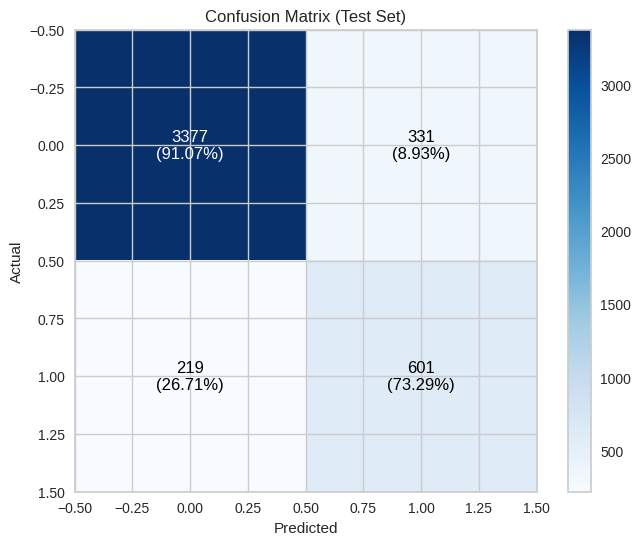

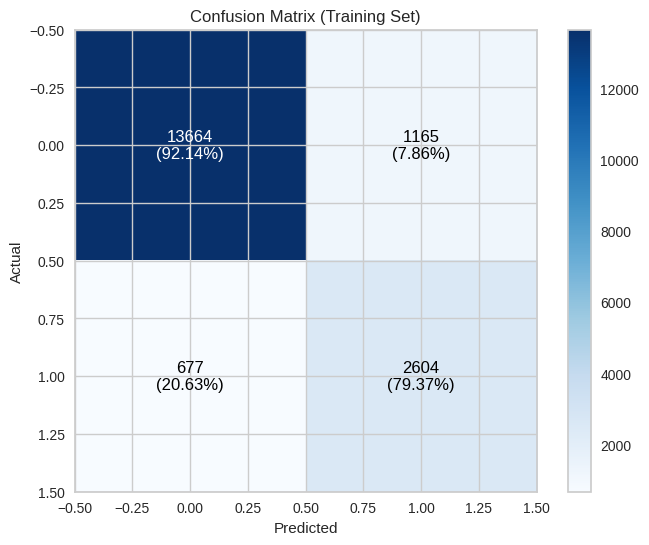

Test Set
Confusion Matrix:
[[3377  331]
 [ 219  601]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3708
           1       0.64      0.73      0.69       820

    accuracy                           0.88      4528
   macro avg       0.79      0.82      0.81      4528
weighted avg       0.89      0.88      0.88      4528

Train Set
Confusion Matrix (Training Set):
[[13664  1165]
 [  677  2604]]
Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     14829
           1       0.69      0.79      0.74      3281

    accuracy                           0.90     18110
   macro avg       0.82      0.86      0.84     18110
weighted avg       0.91      0.90      0.90     18110



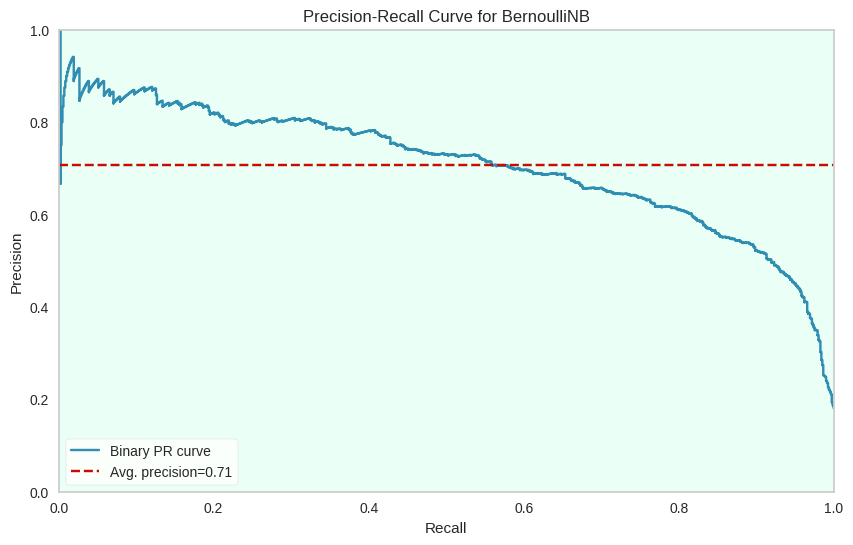

<Figure size 800x600 with 0 Axes>

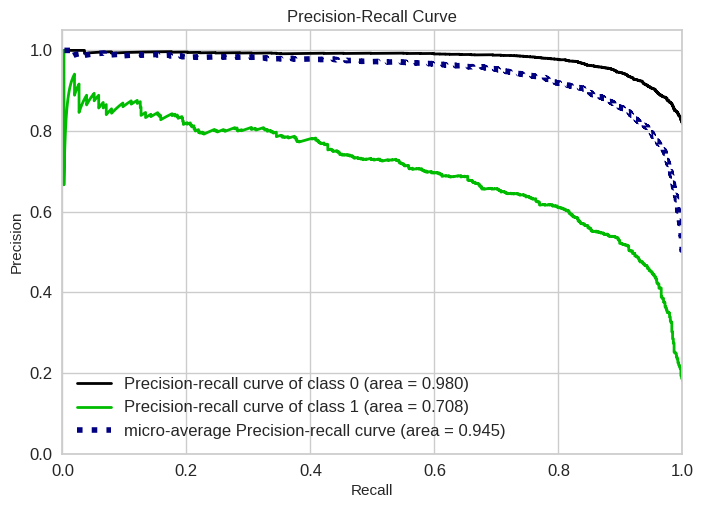

In [100]:
evelll(nbberno_co, X_train_co, X_test_co, y_train, y_test)

In [101]:
y_pred = nbberno_co.predict(X_test_co)
nbberno_co_rec = recall_score(y_test, y_pred)
nbberno_co_f1 = f1_score(y_test, y_pred)
nbberno_cot_AP =  average_precision_score(y_test, nbberno_co.predict_proba(X_test_co)[:, 1])

print("nbberno_co_rec : ", nbberno_co_rec)
print("nbberno_co_f1  : ", nbberno_co_f1)
print("nbberno_co_AP  : ", nbberno_cot_AP)

nbberno_co_rec :  0.7329268292682927
nbberno_co_f1  :  0.6860730593607306
nbberno_co_AP  :  0.7076828175835477


In [102]:
custom_scorer = {'accuracynbberno': make_scorer(accuracy_score),
                 'precision-0nbberno': make_scorer(precision_score, pos_label = 0),
                 'recall-0nbberno': make_scorer(recall_score, pos_label = 0),
                 'f1-0nbberno': make_scorer(f1_score, pos_label = 0),
                 'precision-1nbberno': make_scorer(precision_score, pos_label = 1),
                 'recall-1nbberno': make_scorer(recall_score, pos_label = 1),
                 'f1-1nbberno': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(nbberno_co, X_train_co, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1nbberno":
        nbb_count_rec = scores
    elif i == "f1-1nbberno":
        nbb_count_f1 = scores
    print(f" {i:20} score for count-Bernoullinb : {scores}\n")

 accuracynbberno      score for count-Bernoullinb : 0.8774157923799006

 precision-0nbberno   score for count-Bernoullinb : 0.9385644765706429

 recall-0nbberno      score for count-Bernoullinb : 0.9099058333629083

 f1-0nbberno          score for count-Bernoullinb : 0.9239789090493795

 precision-1nbberno   score for count-Bernoullinb : 0.6426060109869329

 recall-1nbberno      score for count-Bernoullinb : 0.7305647194009934

 f1-1nbberno          score for count-Bernoullinb : 0.6834112092945723



### TF-IDF for both MultinomialNB, BernoulliNB

In [103]:
nb_TF_IDF= MultinomialNB()
nb_TF_IDF.fit(X_train_tf_idf,y_train)

MultinomialNB()

NBMulti_TFIDF MODEL are 


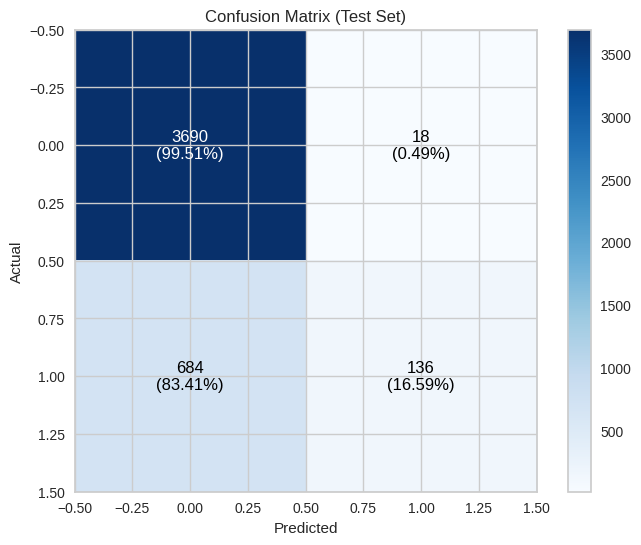

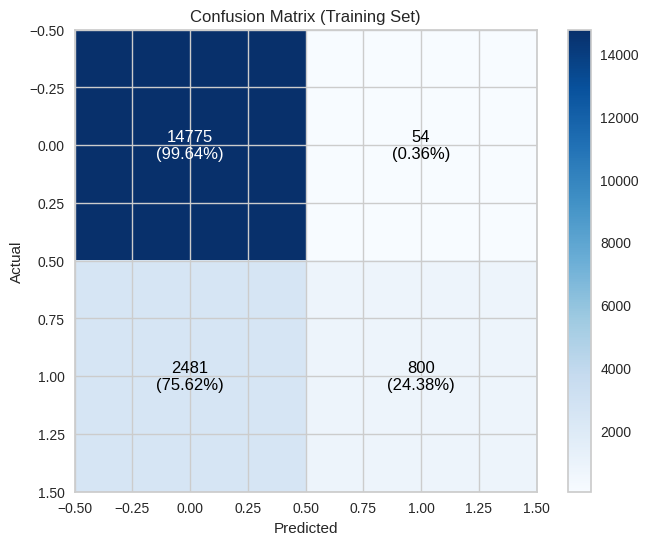

Test Set
Confusion Matrix:
[[3690   18]
 [ 684  136]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3708
           1       0.88      0.17      0.28       820

    accuracy                           0.84      4528
   macro avg       0.86      0.58      0.60      4528
weighted avg       0.85      0.84      0.80      4528

Train Set
Confusion Matrix (Training Set):
[[14775    54]
 [ 2481   800]]
Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     14829
           1       0.94      0.24      0.39      3281

    accuracy                           0.86     18110
   macro avg       0.90      0.62      0.65     18110
weighted avg       0.87      0.86      0.82     18110



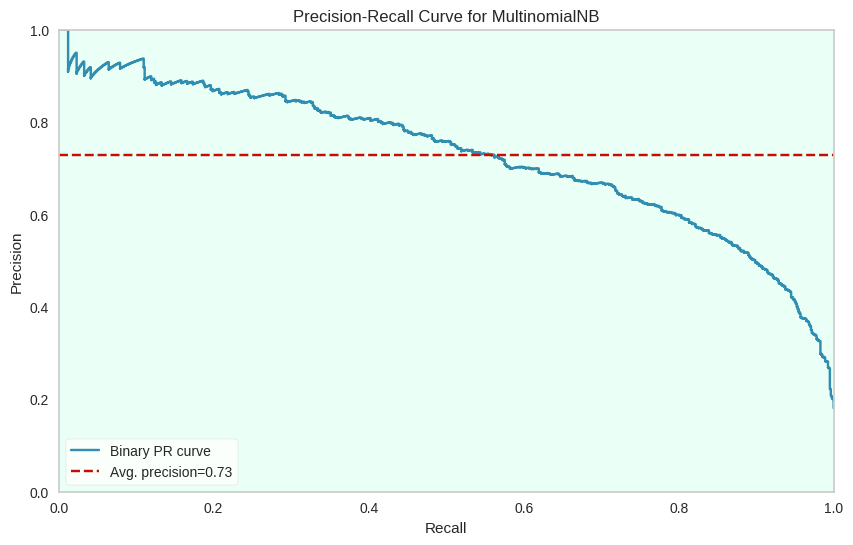

<Figure size 800x600 with 0 Axes>

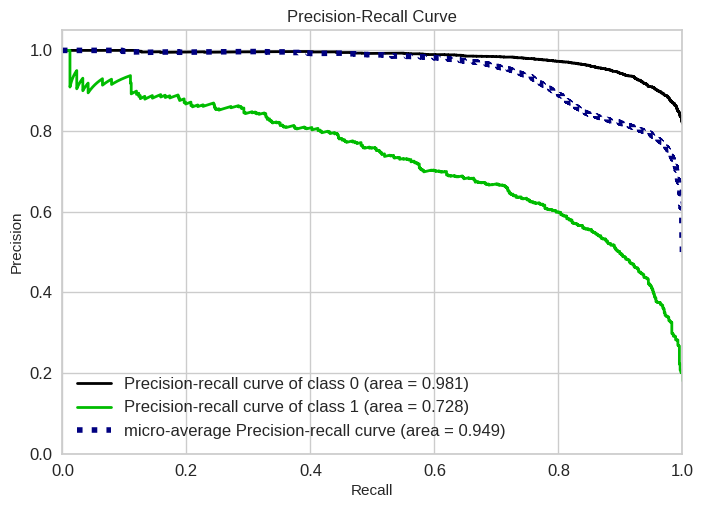

In [104]:
print("NBMulti_TFIDF MODEL are ")
evelll(nb_TF_IDF, X_train_tf_idf, X_test_tf_idf, y_train, y_test)


Test Set:

The model has an accuracy of 84% on the test set.
It performs well in identifying the positive class (class 0) with high precision, recall, and F1-score.
However, it struggles with the negative class (class 1), showing lower precision, recall, and F1-score.
Train Set:

On the training set, the model has an accuracy of 86%.
It exhibits good performance for the positive class (class 0) with high precision, recall, and F1-score.
For the negative class (class 1), precision and recall are lower.                          
Conclusion:

The model is better at identifying the positive class than the negative class.
The recall for the negative class on both the test and training sets is notably lower, indicating that the model has difficulty correctly identifying instances of the negative class.
Consideration for further model improvement, fine-tuning, or exploring different model architectures is recommended, especially with the aim of enhancing performance on the negative class.

In [105]:
y_pred = nb_TF_IDF.predict(X_test_tf_idf)
nb_TF_IDF_rec = recall_score(y_test, y_pred)
nb_TF_IDF_f1 = f1_score(y_test, y_pred)
nb_TF_IDFt_AP =  average_precision_score(y_test, nbberno_co.predict_proba(X_test_tf_idf)[:, 1])

print("nb_TF_IDF_rec : ", nb_TF_IDF_rec)
print("nb_TF_IDF_f1  : ", nb_TF_IDF_f1)
print("nb_TF_IDF_AP  : ", nb_TF_IDFt_AP)

nb_TF_IDF_rec :  0.16585365853658537
nb_TF_IDF_f1  :  0.27926078028747436
nb_TF_IDF_AP  :  0.7076828175835477


In [106]:
custom_scorer = {'accuracyNBM': make_scorer(accuracy_score),
                 'precision-0NBM': make_scorer(precision_score, pos_label = 0),
                 'recall-0NBM': make_scorer(recall_score, pos_label = 0),
                 'f1-0NBM': make_scorer(f1_score, pos_label = 0),
                 'precision-1NBM': make_scorer(precision_score, pos_label = 1),
                 'recall-1NBM': make_scorer(recall_score, pos_label = 1),
                 'f1-1NBM': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(nb_TF_IDF, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1NBM":
        nbm_tfidf_rec = scores
    elif i == "f1-1NBM":
        nbm_tfidf_f1 = scores
    print(f" {i:20} score for NBMulti_TFIDF : {scores}\n")

 accuracyNBM          score for NBMulti_TFIDF : 0.8466040861402542

 precision-0NBM       score for NBMulti_TFIDF : 0.8447389163798908

 recall-0NBM          score for NBMulti_TFIDF : 0.9956841049664984

 f1-0NBM              score for NBMulti_TFIDF : 0.9140178032788032

 precision-1NBM       score for NBMulti_TFIDF : 0.8994043698344532

 recall-1NBM          score for NBMulti_TFIDF : 0.1728102527985766

 f1-1NBM              score for NBMulti_TFIDF : 0.2894300033661491



**BernoulliNB**

In [107]:
nbberno_tfidf = BernoulliNB()
nbberno_tfidf.fit(X_train_tf_idf,y_train)

BernoulliNB()

NBBerno_TFIDF MODEL


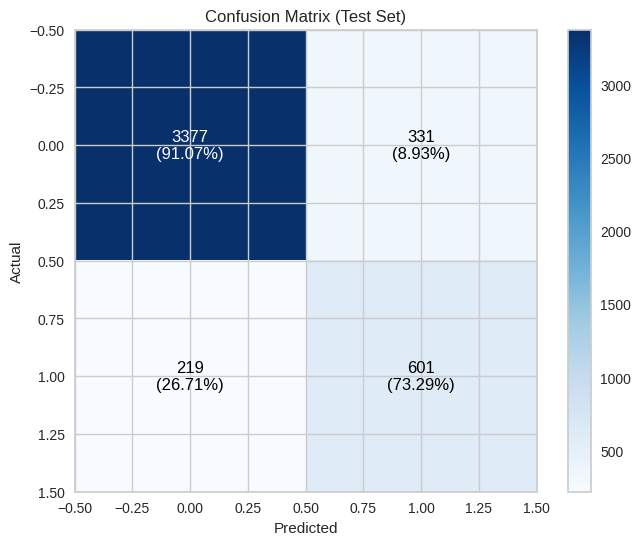

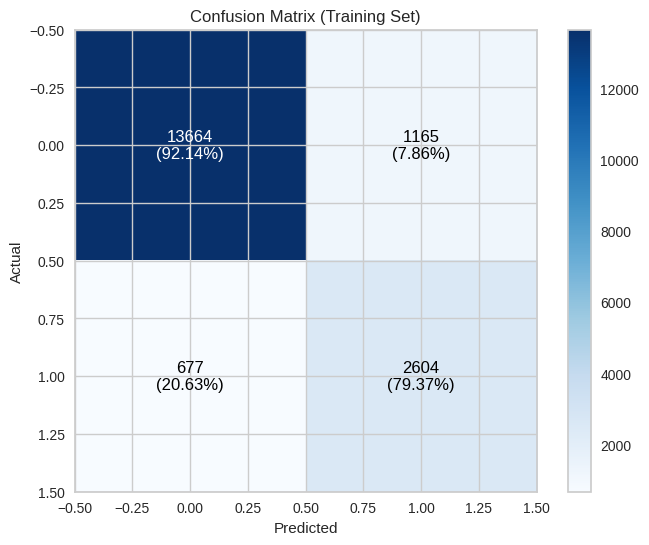

Test Set
Confusion Matrix:
[[3377  331]
 [ 219  601]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3708
           1       0.64      0.73      0.69       820

    accuracy                           0.88      4528
   macro avg       0.79      0.82      0.81      4528
weighted avg       0.89      0.88      0.88      4528

Train Set
Confusion Matrix (Training Set):
[[13664  1165]
 [  677  2604]]
Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     14829
           1       0.69      0.79      0.74      3281

    accuracy                           0.90     18110
   macro avg       0.82      0.86      0.84     18110
weighted avg       0.91      0.90      0.90     18110



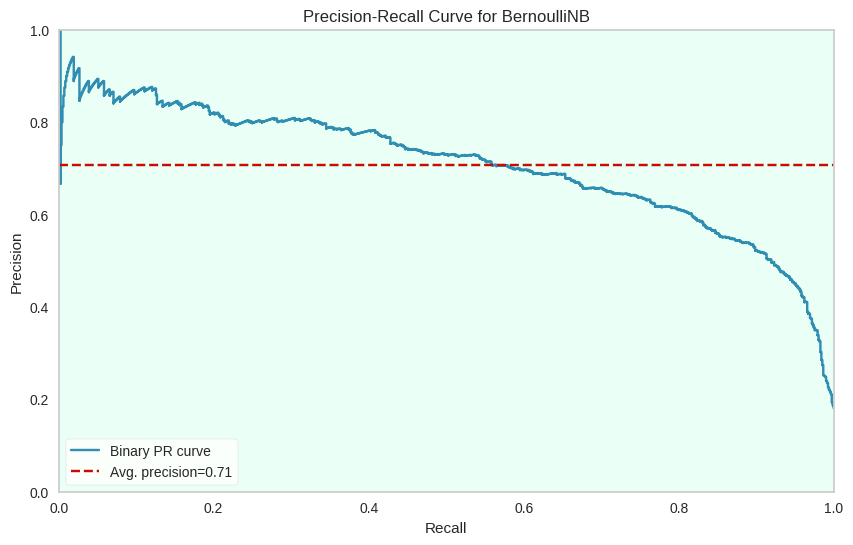

<Figure size 800x600 with 0 Axes>

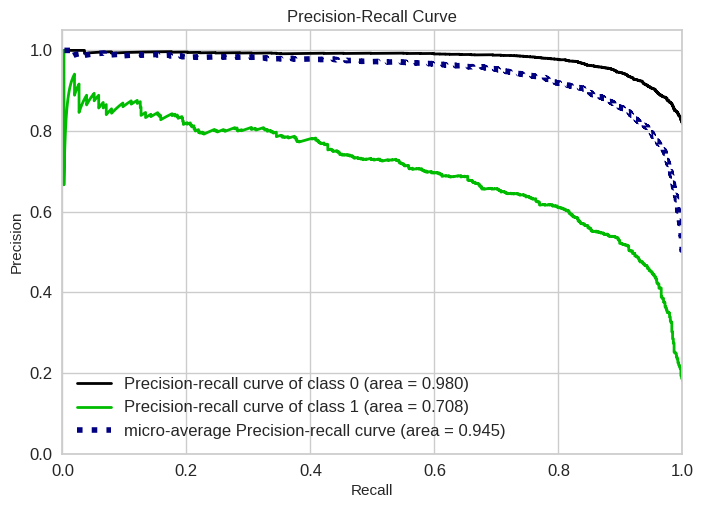

In [108]:
print("NBBerno_TFIDF MODEL")
evelll(nbberno_tfidf, X_train_tf_idf, X_test_tf_idf, y_train, y_test)

Conclusion:

The model is better at identifying the positive class than the negative class.
While achieving high overall accuracy, the model might benefit from improvements, especially in correctly identifying instances of the negative class.
Further fine-tuning, feature engineering, or exploring different model architectures may be considered to enhance the model's performance on both classes, with a focus on improving metrics for the negative class.

In [109]:
y_pred = nbberno_tfidf.predict(X_test_tf_idf)
nbberno_tfidf_rec = recall_score(y_test, y_pred)
nbberno_tfidf_f1 = f1_score(y_test, y_pred)
nbberno_tfidf_AP =  average_precision_score(y_test, nbberno_tfidf.predict_proba(X_test_tf_idf)[:, 1])

print("nbberno_tfidf_rec : ", nbberno_tfidf_rec)
print("nbberno_tfidf_f1  : ", nbberno_tfidf_f1)
print("nbberno_tfidf_AP  : ", nbberno_tfidf_AP)

nbberno_tfidf_rec :  0.7329268292682927
nbberno_tfidf_f1  :  0.6860730593607306
nbberno_tfidf_AP  :  0.7076828175835477


**Cross Validation**

In [110]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nbb_tfidf_rec = scores
    elif i == "f1-1":
        nbb_tfidf_f1 = scores
    print(f" {i:20} score for NBBerno_TFIDF : {scores}\n")

 accuracy             score for NBBerno_TFIDF : 0.8774157923799006

 precision-0          score for NBBerno_TFIDF : 0.9385644765706429

 recall-0             score for NBBerno_TFIDF : 0.9099058333629083

 f1-0                 score for NBBerno_TFIDF : 0.9239789090493795

 precision-1          score for NBBerno_TFIDF : 0.6426060109869329

 recall-1             score for NBBerno_TFIDF : 0.7305647194009934

 f1-1                 score for NBBerno_TFIDF : 0.6834112092945723



## Support Vector Machine (SVM)

### Countvectorizer

In [111]:
from sklearn.svm import LinearSVC
svc_count = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 42)
svc_count.fit(X_train_co,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=42)

In [112]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

def evel2(model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Calculate confusion matrices for test and training sets
    cm = confusion_matrix(y_test, y_pred)
    cm_train = confusion_matrix(y_train, y_pred_train)

    # Plot the confusion matrix for the test set
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Confusion Matrix (Test Set)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # Annotate the plot with values
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f'{cm[i, j]}\n({cm[i, j] / np.sum(cm[i]) * 100:.2f}%)', ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.show()

    # Plot the confusion matrix for the training set
    plt.figure(figsize=(8, 6))
    plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Confusion Matrix (Training Set)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # Annotate the plot with values
    thresh = cm_train.max() / 2
    for i in range(cm_train.shape[0]):
        for j in range(cm_train.shape[1]):
            plt.text(j, i, f'{cm_train[i, j]}\n({cm_train[i, j] / np.sum(cm_train[i]) * 100:.2f}%)',
                     ha="center", va="center", color="white" if cm_train[i, j] > thresh else "black")

    plt.show()

    print("Test Set")
    print("Confusion Matrix:")
    print(cm)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Train Set")
    print("Confusion Matrix (Training Set):")
    print(cm_train)

    print("Classification Report (Training Set):")
    print(classification_report(y_train, y_pred_train))





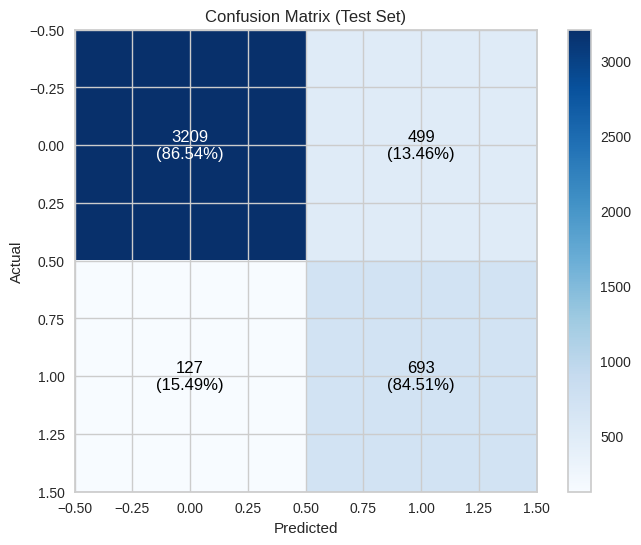

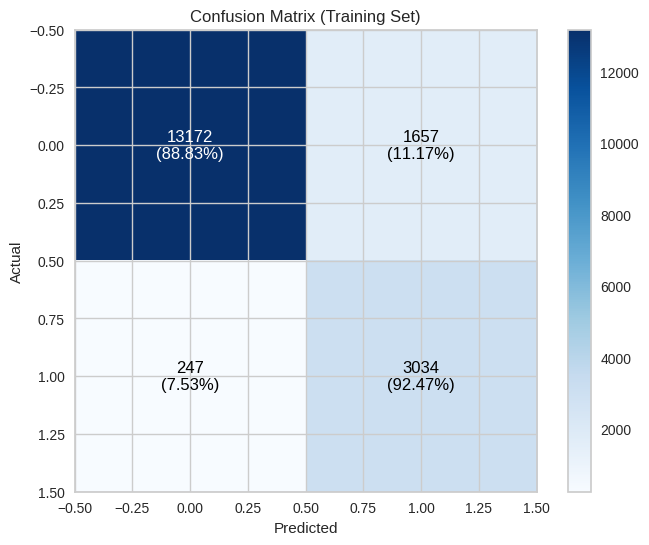

Test Set
Confusion Matrix:
[[3209  499]
 [ 127  693]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3708
           1       0.58      0.85      0.69       820

    accuracy                           0.86      4528
   macro avg       0.77      0.86      0.80      4528
weighted avg       0.89      0.86      0.87      4528

Train Set
Confusion Matrix (Training Set):
[[13172  1657]
 [  247  3034]]
Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14829
           1       0.65      0.92      0.76      3281

    accuracy                           0.89     18110
   macro avg       0.81      0.91      0.85     18110
weighted avg       0.92      0.89      0.90     18110



In [113]:
evel2(svc_count, X_train_co, X_test_co, y_train, y_test)


Test Set:

The model has an accuracy of 86% on the test set.
It performs well in identifying the positive class (class 0) with high precision, recall, and F1-score.
However, it struggles more with the negative class (class 1), showing lower precision, recall, and F1-score.
Train Set:

On the training set, the model has an accuracy of 89%.
It exhibits good performance for the positive class (class 0) with high precision, recall, and F1-score.
For the negative class (class 1), precision and recall are relatively lower.
Conclusion:

The model generalizes reasonably well from the training set to the test set, but there is still room for improvement, especially in correctly identifying instances of the negative class on the test set.
Further fine-tuning, feature engineering, or exploring different model architectures may be considered to enhance the model's performance, particularly in scenarios where identifying the negative class is crucial.






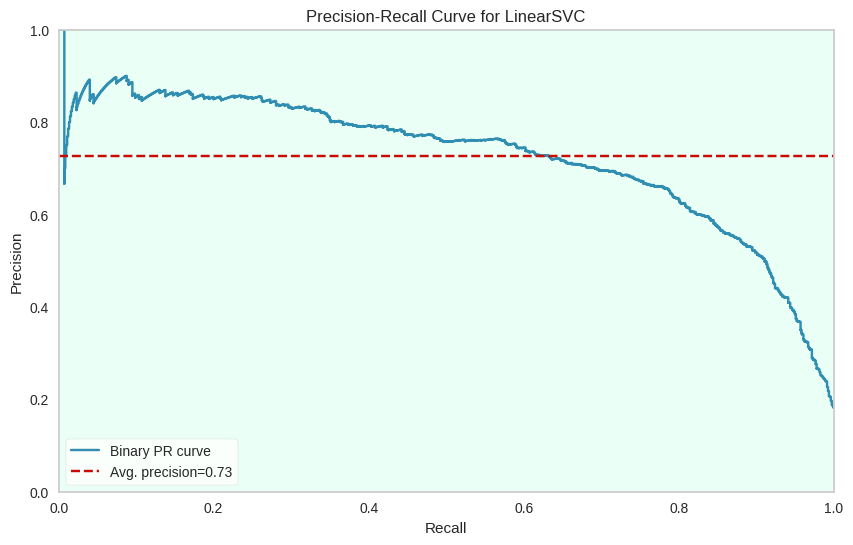

In [114]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=42),
    classes=svc_count.classes_,
    per_class=True,
    cmap="Set1"
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_co, y_train)
viz.score(X_test_co, y_test)
viz.show();

In [115]:
# Calculate recall and F1-score
y_pred = svc_count.predict(X_test_co)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test, y_pred)

# Calculate average precision using decision function
decision_values = viz.decision_function(X_test_co)
svc_count_AP = average_precision_score(y_test, decision_values)

# Print the results
print("svc_count_rec : ", svc_count_rec)
print("svc_count_f1  : ", svc_count_f1)
print("svc_count_AP  : ", svc_count_AP)


svc_count_rec :  0.8451219512195122
svc_count_f1  :  0.6888667992047715
svc_count_AP  :  0.7262592670220572


In [116]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(svc_count, X_train_co, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    print(f" {i:20} score for SVC_Count : {scores}\n")

 accuracy             score for SVC_Count : 0.8631695196024296

 precision-0          score for SVC_Count : 0.95880499952629

 recall-0             score for SVC_Count : 0.8703217663433442

 f1-0                 score for SVC_Count : 0.9124034583587595

 precision-1          score for SVC_Count : 0.5864695436085479

 recall-1             score for SVC_Count : 0.8308408703387945

 f1-1                 score for SVC_Count : 0.6874661850753252



### TD-IDF

In [117]:
svc_tf_idf = LinearSVC( class_weight = "balanced", random_state = 42)
svc_tf_idf.fit(X_train_tf_idf,y_train)

LinearSVC(class_weight='balanced', random_state=42)

SVC_TFIDF Model


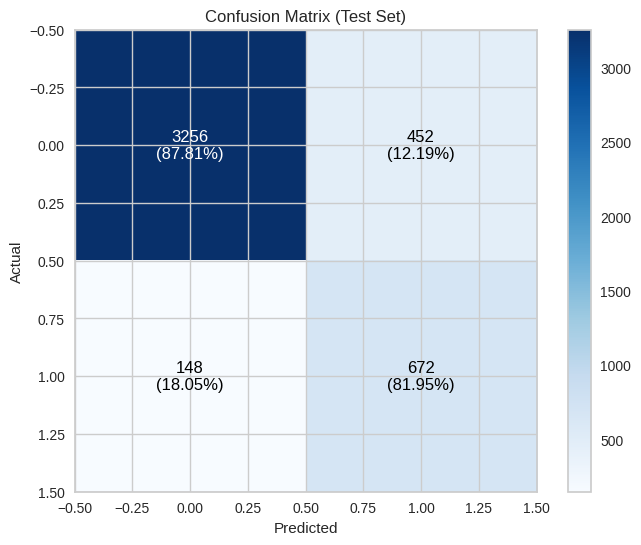

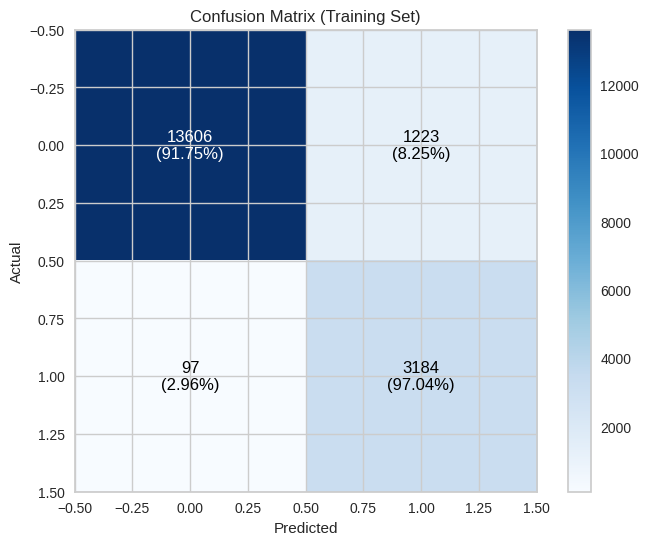

Test Set
Confusion Matrix:
[[3256  452]
 [ 148  672]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3708
           1       0.60      0.82      0.69       820

    accuracy                           0.87      4528
   macro avg       0.78      0.85      0.80      4528
weighted avg       0.89      0.87      0.88      4528

Train Set
Confusion Matrix (Training Set):
[[13606  1223]
 [   97  3184]]
Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     14829
           1       0.72      0.97      0.83      3281

    accuracy                           0.93     18110
   macro avg       0.86      0.94      0.89     18110
weighted avg       0.94      0.93      0.93     18110



In [118]:
print("SVC_TFIDF Model")
evel2(svc_tf_idf, X_train_tf_idf, X_test_tf_idf, y_train, y_test)


Test Set:

The model has an accuracy of 87% on the test set.
It performs well in identifying the positive class (class 0) with high precision, recall, and F1-score.
However, it struggles more with the negative class (class 1), showing lower precision, recall, and F1-score.
Train Set:

On the training set, the model has an accuracy of 93%.
It exhibits excellent performance for the positive class (class 0) with high precision, recall, and F1-score.
For the negative class (class 1), precision and recall are relatively lower.
Conclusion:

The model generalizes well from the training set to the test set, maintaining high performance for the positive class.
There is room for improvement, especially in correctly identifying instances of the negative class on the test set.
Further fine-tuning, feature engineering, or exploring different model architectures may be considered to enhance the model's performance, particularly for the negative class on the test set.

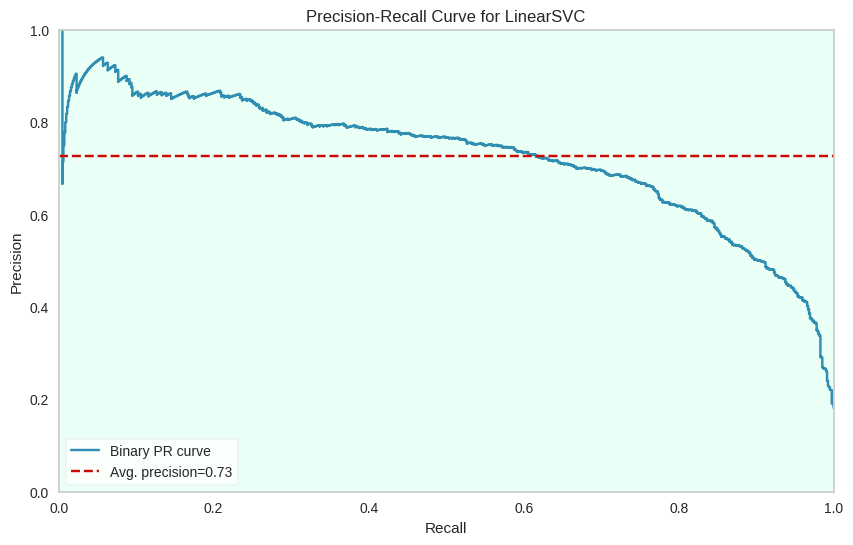

In [119]:
viz1 = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=42),
    classes=svc_tf_idf.classes_,
    per_class=True,
    cmap="Set1"
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')

viz1.fit(X_train_tf_idf, y_train)
viz1.score(X_test_tf_idf, y_test)
viz1.show();

In [120]:
y_pred = svc_tf_idf.predict(X_test_tf_idf)
svc_tf_idf_rec = recall_score(y_test, y_pred)
svc_tf_idf_f1 = f1_score(y_test, y_pred)

# Calculate average precision using decision function
decision_val = viz1.decision_function(X_test_tf_idf)  # Use the decision function from the visualizer
svc_tf_idf_AP = average_precision_score(y_test, decision_val)

print("SVC_TFIDF_rec   : ", svc_tf_idf_rec)
print("SVC_TFIDF_f1   : ", svc_tf_idf_f1)
print("SVC_TFIDF_AP   : ", svc_tf_idf_AP)

SVC_TFIDF_rec   :  0.8195121951219512
SVC_TFIDF_f1   :  0.691358024691358
SVC_TFIDF_AP   :  0.7269490351733037


# **With Cross Validation**

In [121]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(svc_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_tfidf_rec = scores
    elif i == "f1-1":
        svc_tfidf_f1 = scores
    print(f" {i:20} score for SVC_TFIDF : {scores}\n")

 accuracy             score for SVC_TFIDF : 0.8643290999447819

 precision-0          score for SVC_TFIDF : 0.9482256585906853

 recall-0             score for SVC_TFIDF : 0.8825275297273736

 f1-0                 score for SVC_TFIDF : 0.914182126016829

 precision-1          score for SVC_TFIDF : 0.5957189505074142

 recall-1             score for SVC_TFIDF : 0.7820807695159018

 f1-1                 score for SVC_TFIDF : 0.6761782277818631



In [122]:
SVC_TFIDF_AP = viz1.score_
SVC_TFIDF_AP

0.7269490351733037

# Random Forest

### Countvectorizer

In [123]:
from sklearn.ensemble import RandomForestClassifier

rf_count = RandomForestClassifier(n_estimators = 50, max_depth = 4, class_weight = "balanced", random_state = 42, n_jobs = -1)
rf_count.fit(X_train_co, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=50,
                       n_jobs=-1, random_state=42)

to reduse the run time i use thise param small number or can i use sub set of train

RF_Count Model


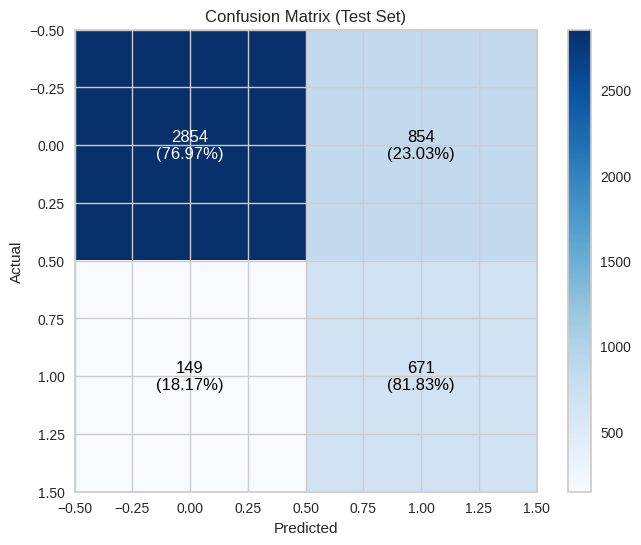

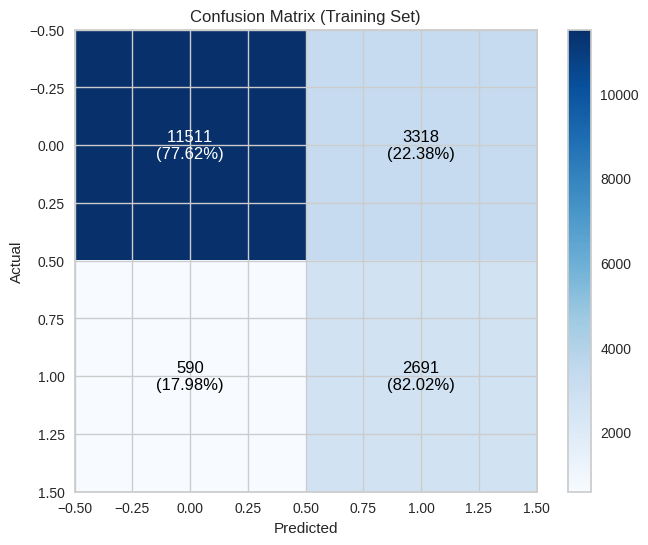

Test Set
Confusion Matrix:
[[2854  854]
 [ 149  671]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      3708
           1       0.44      0.82      0.57       820

    accuracy                           0.78      4528
   macro avg       0.70      0.79      0.71      4528
weighted avg       0.86      0.78      0.80      4528

Train Set
Confusion Matrix (Training Set):
[[11511  3318]
 [  590  2691]]
Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.95      0.78      0.85     14829
           1       0.45      0.82      0.58      3281

    accuracy                           0.78     18110
   macro avg       0.70      0.80      0.72     18110
weighted avg       0.86      0.78      0.80     18110



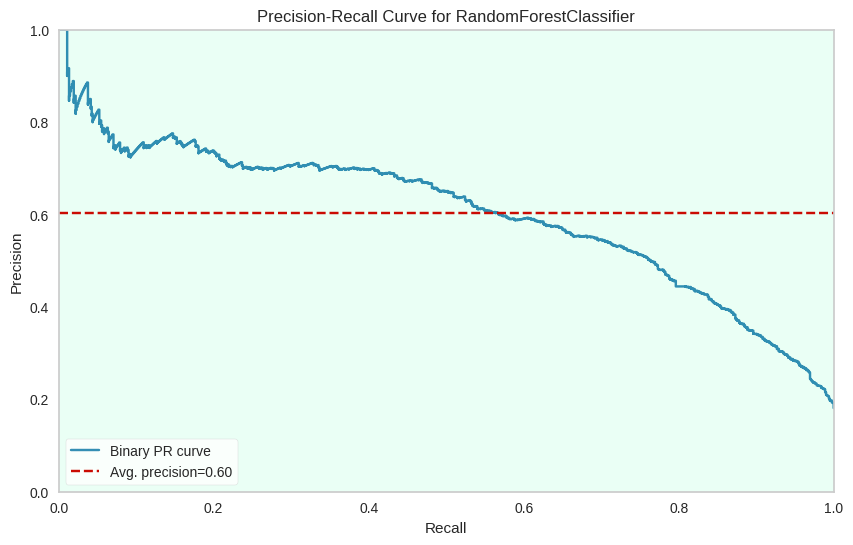

<Figure size 800x600 with 0 Axes>

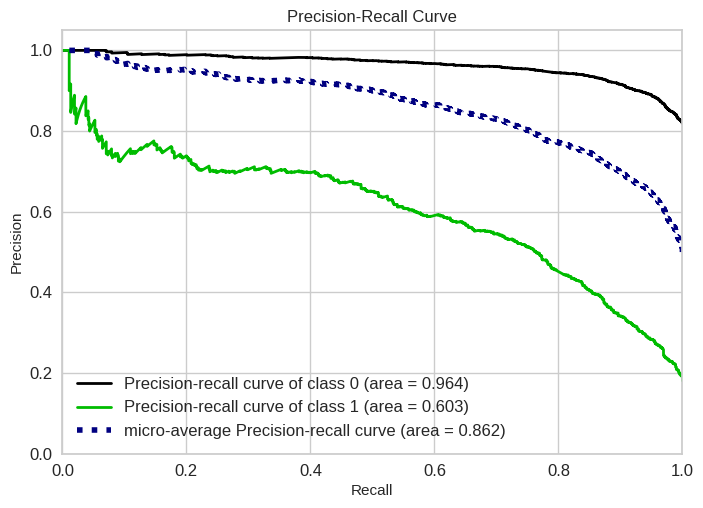

In [124]:
print("RF_Count Model")
evelll(rf_count, X_train_co, X_test_co, y_train, y_test)


Test Set:

The model has an accuracy of 78% on the test set.
It struggles more with identifying the positive class (class 0), showing lower precision, recall, and F1-score.
It performs better with the negative class (class 1) in terms of precision and recall.
Train Set:

On the training set, the model has an accuracy of 78%.
It exhibits similar challenges as in the test set, with difficulty in identifying the positive class (class 0) compared to the negative class (class 1).
Conclusion:

The model faces challenges in correctly identifying instances of the positive class, both in the training and test sets.
Further improvement is needed, especially in precision, recall, and F1-score for the positive class.
Consideration of additional features, model fine-tuning, or exploring different algorithms may be beneficial to enhance performance, particularly for the positive class.

In [125]:
y_pred = rf_count.predict(X_test_co)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test, y_pred)
rf_count_AP =  average_precision_score(y_test, rf_count.predict_proba(X_test_co)[:, 1])

print("rf_count_rec : ", rf_count_rec)
print("rf_count_f1  : ", rf_count_f1)
print("rf_count_AP  : ", rf_count_AP)

rf_count_rec :  0.8182926829268292
rf_count_f1  :  0.5722814498933901
rf_count_AP  :  0.6029619794441812


In [126]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(rf_count, X_train_co, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    print(f" {i:20} score for SVC_Count : {scores}\n")

 accuracy             score for SVC_Count : 0.7877967973495306

 precision-0          score for SVC_Count : 0.9493509516841812

 recall-0             score for SVC_Count : 0.7826547475072868

 f1-0                 score for SVC_Count : 0.8578278837642509

 precision-1          score for SVC_Count : 0.4532307594962256

 recall-1             score for SVC_Count : 0.8110367707020535

 f1-1                 score for SVC_Count : 0.5810835255950147



In [127]:
rf_count_AP = viz.score_
rf_count_AP

0.7262592670220572

### TF-IDF

In [128]:
from sklearn.ensemble import RandomForestClassifier

rf_tf_idf = RandomForestClassifier(n_estimators = 50, max_depth = 4, class_weight = "balanced", random_state = 42, n_jobs = -1)
rf_tf_idf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=50,
                       n_jobs=-1, random_state=42)

RF_TFIDF Model


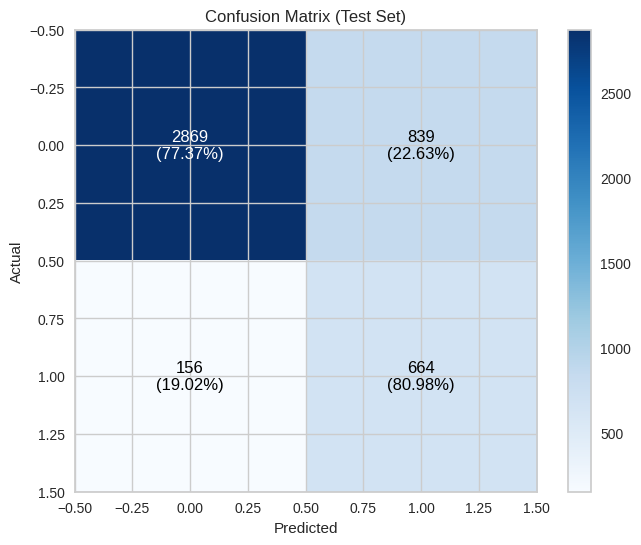

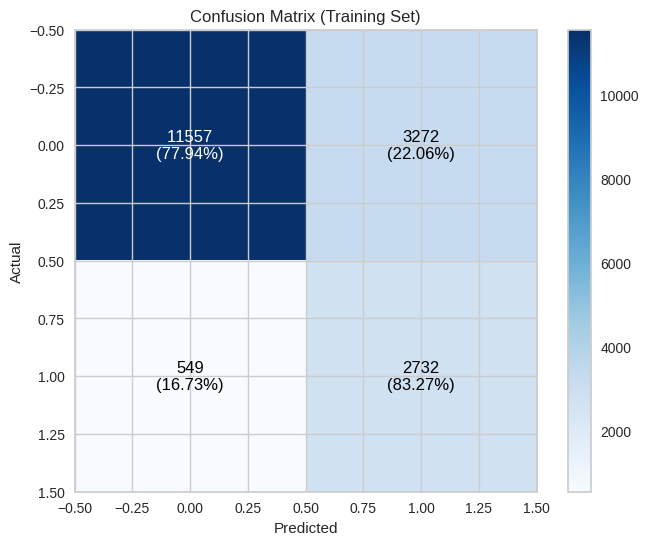

Test Set
Confusion Matrix:
[[2869  839]
 [ 156  664]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      3708
           1       0.44      0.81      0.57       820

    accuracy                           0.78      4528
   macro avg       0.70      0.79      0.71      4528
weighted avg       0.86      0.78      0.80      4528

Train Set
Confusion Matrix (Training Set):
[[11557  3272]
 [  549  2732]]
Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     14829
           1       0.46      0.83      0.59      3281

    accuracy                           0.79     18110
   macro avg       0.70      0.81      0.72     18110
weighted avg       0.86      0.79      0.81     18110



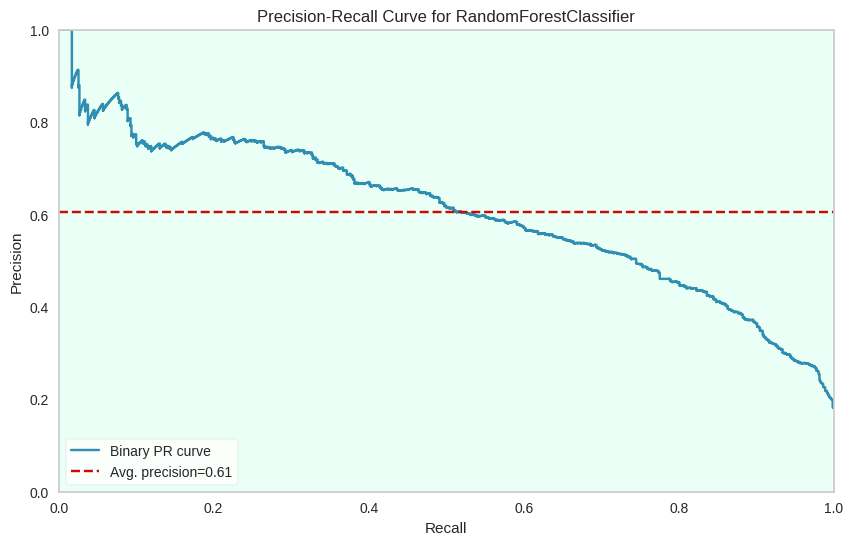

<Figure size 800x600 with 0 Axes>

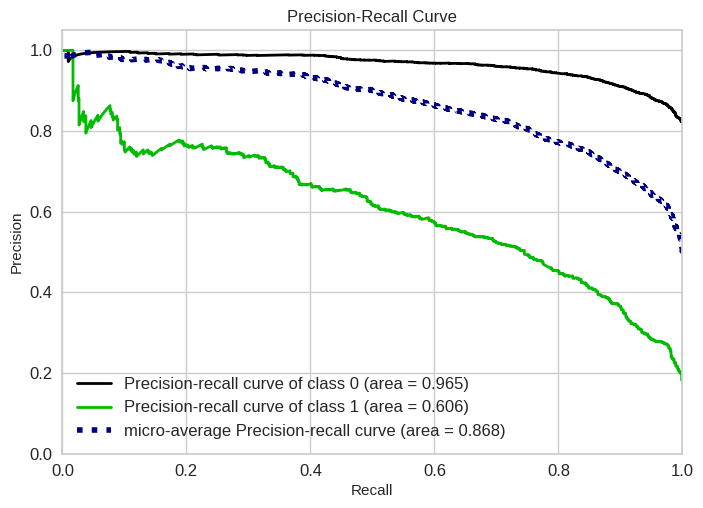

In [129]:
print("RF_TFIDF Model")
evelll(rf_tf_idf, X_train_tf_idf, X_test_tf_idf, y_train, y_test)

Test Set:

The model has an accuracy of 78% on the test set.
It faces challenges in correctly identifying the positive class (class 0), with lower precision, recall, and F1-score.
The negative class (class 1) is identified with higher precision and recall.
Train Set:

On the training set, the model has an accuracy of 79%.
Similar to the test set, it exhibits difficulties in correctly identifying instances of the positive class (class 0) compared to the negative class (class 1).
Conclusion:

The model encounters challenges in accurately identifying instances of the positive class, both in the training and test sets.
Further refinement is needed, particularly in precision, recall, and F1-score for the positive class.
Exploring additional features, conducting fine-tuning, or considering alternative algorithms may be worthwhile to improve the model's performance, especially for the positive class.

In [130]:
y_pred = rf_tf_idf.predict(X_test_tf_idf)
rf_tf_idf_rec = recall_score(y_test, y_pred)
rf_tf_idf_f1 = f1_score(y_test, y_pred)
rf_tf_idf_AP =  average_precision_score(y_test, rf_tf_idf.predict_proba(X_test_tf_idf)[:, 1] )

print("rf_tf_idf_rec : ", rf_tf_idf_rec)
print("rf_tf_idf_f1  : ", rf_tf_idf_f1)
print("rf_tf_idf_AP  : ", rf_tf_idf_AP)

rf_tf_idf_rec :  0.8097560975609757
rf_tf_idf_f1  :  0.571674558760224
rf_tf_idf_AP  :  0.6064735568306966


In [131]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(rf_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_tfidf_rec = scores
    elif i == "f1-1":
        rf_tfidf_f1 = scores
    print(f" {i:20} score for RF_TFIDF : {scores}\n")

 accuracy             score for RF_TFIDF : 0.7781888459414688

 precision-0          score for RF_TFIDF : 0.9458102435878913

 recall-0             score for RF_TFIDF : 0.7735520787549037

 f1-0                 score for RF_TFIDF : 0.8509511089978854

 precision-1          score for RF_TFIDF : 0.4386680099675481

 recall-1             score for RF_TFIDF : 0.7991641337386018

 f1-1                 score for RF_TFIDF : 0.5661628576454756



In [132]:
RF_TFIDF_AP = viz.score_
RF_TFIDF_AP

0.7262592670220572

## Ada Boosting

### Countvectorizer

In [133]:
from sklearn.ensemble import AdaBoostClassifier

ada_count = AdaBoostClassifier(n_estimators = 50, random_state = 42)
ada_count.fit(X_train_co, y_train)

AdaBoostClassifier(random_state=42)

Ada_Count Model


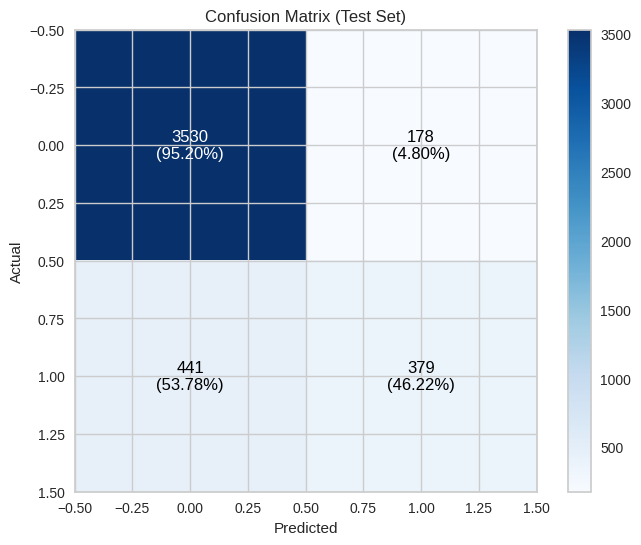

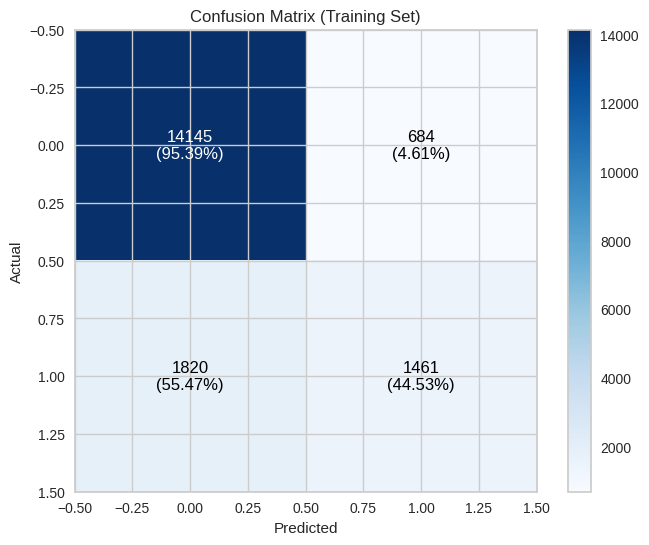

Test Set
Confusion Matrix:
[[3530  178]
 [ 441  379]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3708
           1       0.68      0.46      0.55       820

    accuracy                           0.86      4528
   macro avg       0.78      0.71      0.73      4528
weighted avg       0.85      0.86      0.85      4528

Train Set
Confusion Matrix (Training Set):
[[14145   684]
 [ 1820  1461]]
Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     14829
           1       0.68      0.45      0.54      3281

    accuracy                           0.86     18110
   macro avg       0.78      0.70      0.73     18110
weighted avg       0.85      0.86      0.85     18110



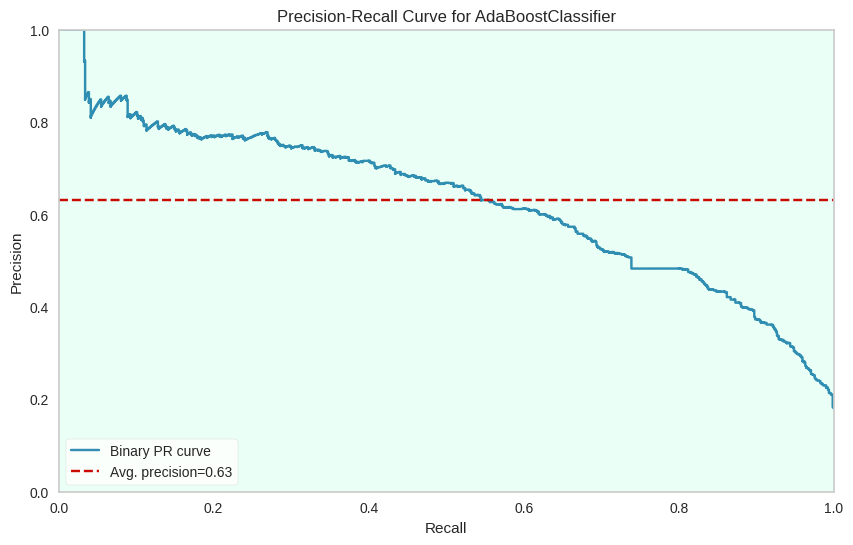

<Figure size 800x600 with 0 Axes>

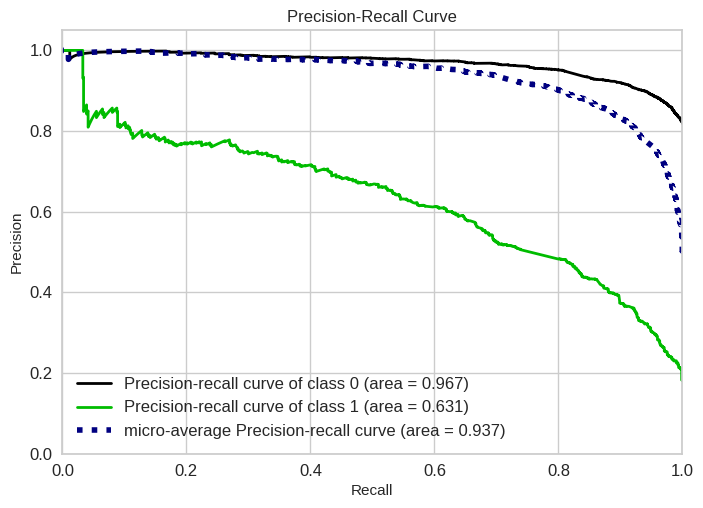

In [134]:
print("Ada_Count Model")
evelll(ada_count, X_train_co, X_test_co, y_train, y_test)

Test Set:

The model has an accuracy of 86% on the test set.
It performs well in identifying the negative class (class 0) with high precision, recall, and F1-score.
However, it struggles more with the positive class (class 1), showing lower precision, recall, and F1-score.
Train Set:

On the training set, the model has an accuracy of 86%.
It exhibits similar challenges as in the test set, facing difficulties in correctly identifying instances of the positive class (class 0).
Conclusion:

The model shows good performance for the negative class but encounters difficulties in accurately identifying instances of the positive class.
Further improvement, especially in precision, recall, and F1-score for the positive class, may be achieved through fine-tuning, feature engineering, or exploring different model architectures.

In [135]:
y_pred = ada_count.predict(X_test_co)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test, y_pred)

ada_count_AP =  average_precision_score(y_test, ada_count.predict_proba(X_test_co)[:, 1])
print("Ada_Count_rec : ", ada_count_rec)
print("Ada_Count_f1  : ", ada_count_f1)
print("Ada_Count_AP  : ", ada_count_AP)

Ada_Count_rec :  0.46219512195121953
Ada_Count_f1  :  0.5504720406681191
Ada_Count_AP  :  0.6309442544943985


In [136]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(ada_count, X_train_co, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_count_rec = scores
    elif i == "f1-1":
        ada_count_f1 = scores
    print(f" {i:20} score for Ada_Count : {scores}\n")

 accuracy             score for Ada_Count : 0.8596907785753727

 precision-0          score for Ada_Count : 0.8845050600104709

 recall-0             score for Ada_Count : 0.9531322145812687

 f1-0                 score for Ada_Count : 0.9175240562071318

 precision-1          score for Ada_Count : 0.674154949541093

 recall-1             score for Ada_Count : 0.43736377789309805

 f1-1                 score for Ada_Count : 0.5301217748029973



### TF-IDF

In [137]:
ada_tf_idf = AdaBoostClassifier(n_estimators = 50, random_state = 42)
ada_tf_idf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(random_state=42)

Ada_TFIDF Model


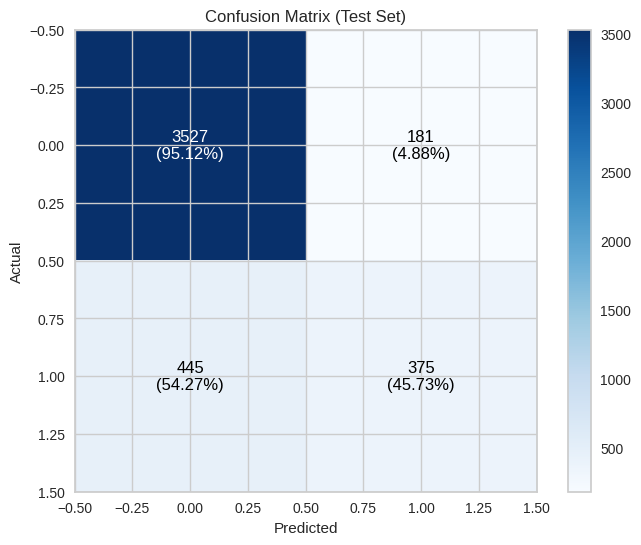

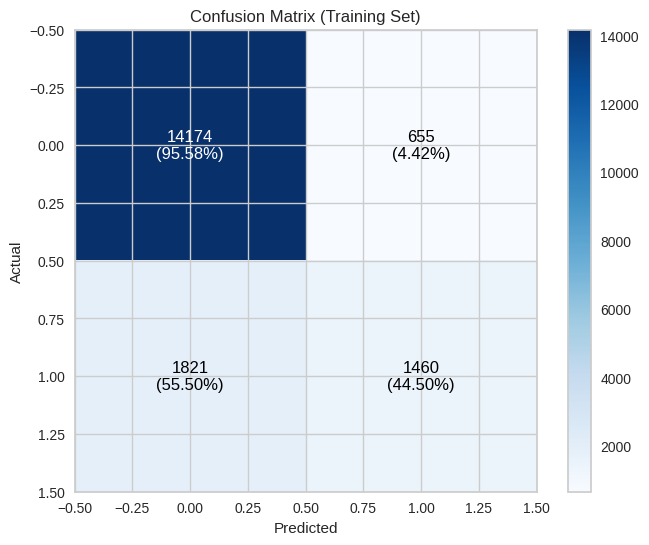

Test Set
Confusion Matrix:
[[3527  181]
 [ 445  375]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3708
           1       0.67      0.46      0.55       820

    accuracy                           0.86      4528
   macro avg       0.78      0.70      0.73      4528
weighted avg       0.85      0.86      0.85      4528

Train Set
Confusion Matrix (Training Set):
[[14174   655]
 [ 1821  1460]]
Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     14829
           1       0.69      0.44      0.54      3281

    accuracy                           0.86     18110
   macro avg       0.79      0.70      0.73     18110
weighted avg       0.85      0.86      0.85     18110



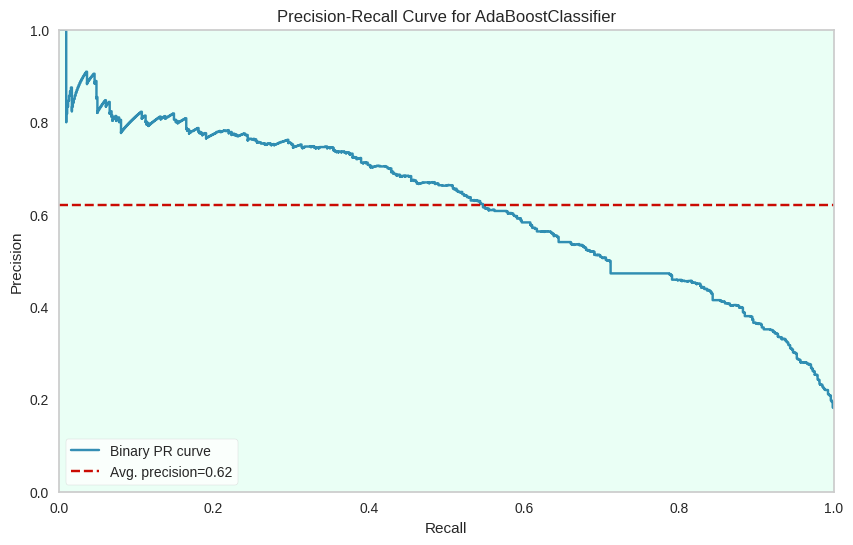

<Figure size 800x600 with 0 Axes>

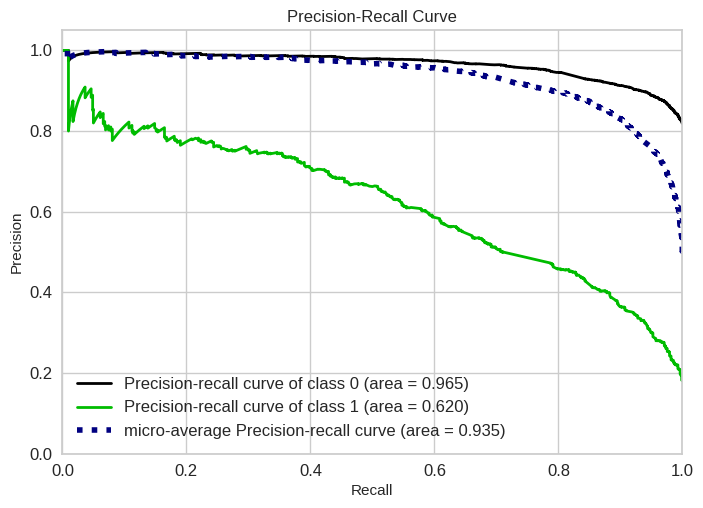

In [138]:
print("Ada_TFIDF Model")
evelll(ada_tf_idf, X_train_tf_idf, X_test_tf_idf, y_train, y_test)


Test Set:

The model has an accuracy of 86% on the test set.
It performs well in identifying the negative class (class 0) with high precision, recall, and F1-score.
However, it struggles more with the positive class (class 1), showing lower precision, recall, and F1-score.
Train Set:

On the training set, the model has an accuracy of 86%.
It exhibits similar challenges as in the test set, facing difficulties in correctly identifying instances of the positive class (class 0).
Conclusion:

The model shows good performance for the negative class but encounters difficulties in accurately identifying instances of the positive class.
Further improvement, especially in precision, recall, and F1-score for the positive class, may be achieved through fine-tuning, feature engineering, or exploring different model architectures.

In [139]:
y_pred = ada_tf_idf.predict(X_test_tf_idf)
ada_tf_idf_rec = recall_score(y_test, y_pred)
ada_tf_idf_f1 = f1_score(y_test, y_pred)
ada_tf_idf_AP  =  average_precision_score(y_test, ada_tf_idf.predict_proba(X_test_tf_idf)[:, 1])

print("ada_tf_idf_rec : ", ada_tf_idf_rec)
print("ada_tf_idf_f1 : ", ada_tf_idf_f1)
print("ada_tf_idf_AP   : ", ada_tf_idf_AP )

ada_tf_idf_rec :  0.4573170731707317
ada_tf_idf_f1 :  0.5450581395348837
ada_tf_idf_AP   :  0.6201238720076104


**Cross Validation**

In [140]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(ada_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_tfidf_rec = scores
    elif i == "f1-1":
        ada_tfidf_f1 = scores
    print(f" {i:20} score for Ada_TFIDF : {scores}\n")

 accuracy             score for Ada_TFIDF : 0.8583655438983986

 precision-0          score for Ada_TFIDF : 0.8835057347778846

 recall-0             score for Ada_TFIDF : 0.9526600163981715

 f1-0                 score for Ada_TFIDF : 0.9167727966094052

 precision-1          score for Ada_TFIDF : 0.6690648488716958

 recall-1             score for Ada_TFIDF : 0.4321901178738231

 f1-1                 score for Ada_TFIDF : 0.5249010993816284



## DL modeling

same prossing that i do befor

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
print('Using Tensorflow version:', tf.__version__)

Using Tensorflow version: 2.12.0


In [142]:
import pandas as pd

# Read the CSV file
dl = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [143]:
dl = dl[["Review Text","Recommended IND"]]
dl.head()

Review Text  Recommended IND
0  Absolutely wonderful - silky and sexy and comf...                1
1  Love this dress!  it's sooo pretty.  i happene...                1
2  I had such high hopes for this dress and reall...                0
3  I love, love, love this jumpsuit. it's fun, fl...                1
4  This shirt is very flattering to all due to th...                1

In [144]:
dl.rename(columns = {'Review Text':'Review', 'Recommended IND':'Recommended'}, inplace = True)

In [145]:
dl.shape

(23486, 2)

In [146]:
dl.isnull().sum()

Review         845
Recommended      0
dtype: int64

In [147]:
dl = dl.dropna(subset = ['Review'], axis = 0)
dl = dl.reset_index(drop = True)

In [148]:
dl.isnull().sum()

Review         0
Recommended    0
dtype: int64

In [149]:
dl.shape

(22641, 2)

In [150]:
dl.head()

Review  Recommended
0  Absolutely wonderful - silky and sexy and comf...            1
1  Love this dress!  it's sooo pretty.  i happene...            1
2  I had such high hopes for this dress and reall...            0
3  I love, love, love this jumpsuit. it's fun, fl...            1
4  This shirt is very flattering to all due to th...            1

In [151]:
dl.reset_index(drop=True, inplace=True)

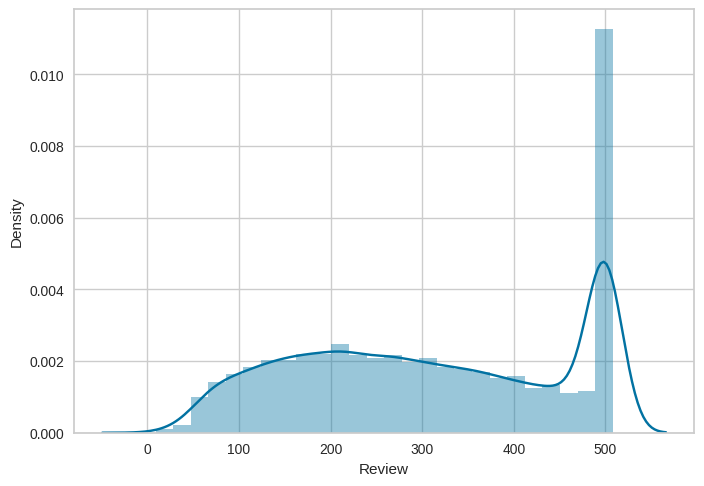

In [152]:
import seaborn as sns
import pandas as pd
sns.distplot(dl['Review'].apply(len));

In [153]:
print("Max Len:", max(map(len, dl['Review'])))

Max Len: 508


### Tokenization

In [154]:
X = dl['Review'].values
y = dl['Recommended'].map({0:1, 1:0}).values

 specify the maximum number of words to keep based of frequncy

In [155]:
num_words = 10000
tokenizer = Tokenizer(num_words = num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890')


In [156]:
tokenizer.fit_on_texts(X)

### Creating word index

In [157]:
#Creating word index
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 "'": 48,
 'look': 49,
 'if': 50,
 'more': 51,
 'really': 52,
 'ordered': 53,
 'little': 54,
 'perfect': 55,
 'will': 56,
 'one': 57,
 'these': 58,
 'flattering': 59,
 'well': 60,
 'an': 61,
 'soft': 62,
 'out': 63,
 'back': 64,
 'because': 65,
 'had': 66,
 'can': 67,
 '\r': 68,
 'comfortable': 69,
 'cute': 70,
 'nice': 71,
 'than': 72,
 'bought': 73,
 'beautiful': 74,
 'when': 75,
 'all': 76,
 'looks': 77,
 'bit': 78,
 'fits': 79,
 'l

In [158]:
len(tokenizer.word_index)# to know the number of word

14175

### Converting tokens to numeric

In [159]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [160]:
import numpy as np

num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [161]:
len(X_num_tokens)

22641

### Maximum number of tokens for all documents¶

In [162]:
num_tokens.max()

114

In [163]:
num_tokens.mean()

59.82103263990106

In [164]:
num_tokens.argmax()

16263

In [165]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [166]:
num_tokens.argmin()

820

In [167]:
X[820]

'Great style!'

### Fixing token counts of all documents (pad_sequences)

In [168]:
max_tokens = 114

In [169]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.999911664679122

In [170]:
X_pad = pad_sequences(X_num_tokens, maxlen = max_tokens)

In [171]:
X_pad.shape

(22641, 114)

In [172]:
maxlen=114

### Train Set Split

In [173]:
from sklearn.model_selection import train_test_split
from keras.layers import Bidirectional

In [174]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=42)



# LSTM MODEL

In [175]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,GRU,Bidirectional
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2


model=Sequential()

model.add(Embedding(input_dim=num_words,output_dim=32,input_length=maxlen))

model.add(LSTM(units=64,dropout=0.4,return_sequences=True))
model.add(LSTM(units=64,dropout=0.4,return_sequences=True))

Dense(16, activation='relu')

model.add(LSTM(units=20))
model.add(Dropout(0.5))


model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['Recall'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 114, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 114, 64)           24832     
                                                                 
 lstm_1 (LSTM)               (None, 114, 64)           33024     
                                                                 
 lstm_2 (LSTM)               (None, 20)                6800      
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 384,677
Trainable params: 384,677
Non-trai

In [176]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min",
                           verbose=1, patience = 10, restore_best_weights=True)

In [177]:
model.fit(X_train,y_train, epochs=20, batch_size=32, validation_data=(X_test , y_test), callbacks= [early_stop])

Epoch 1/20
566/566 [==============================] - 138s 228ms/step - loss: 0.4410 - recall: 0.1439 - val_loss: 0.3368 - val_recall: 0.5561
Epoch 2/20
566/566 [==============================] - 124s 218ms/step - loss: 0.2756 - recall: 0.6379 - val_loss: 0.2688 - val_recall: 0.8061
Epoch 3/20
566/566 [==============================] - 127s 225ms/step - loss: 0.2263 - recall: 0.7348 - val_loss: 0.2867 - val_recall: 0.4939
Epoch 4/20
566/566 [==============================] - 127s 224ms/step - loss: 0.2011 - recall: 0.7894 - val_loss: 0.2934 - val_recall: 0.5366
Epoch 5/20
566/566 [==============================] - 127s 225ms/step - loss: 0.1807 - recall: 0.8132 - val_loss: 0.2835 - val_recall: 0.6293
Epoch 6/20
566/566 [==============================] - 125s 220ms/step - loss: 0.1682 - recall: 0.8284 - val_loss: 0.2692 - val_recall: 0.6768
Epoch 7/20
566/566 [==============================] - 123s 217ms/step - loss: 0.1588 - recall: 0.8366 - val_loss: 0.2907 - val_recall: 0.7427
Epoch 

In [178]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

loss    recall  val_loss  val_recall
0  0.440998  0.143859  0.336766    0.556098
1  0.275604  0.637915  0.268796    0.806098
2  0.226298  0.734837  0.286687    0.493902
3  0.201060  0.789393  0.293381    0.536585
4  0.180671  0.813167  0.283530    0.629268

<Axes: >

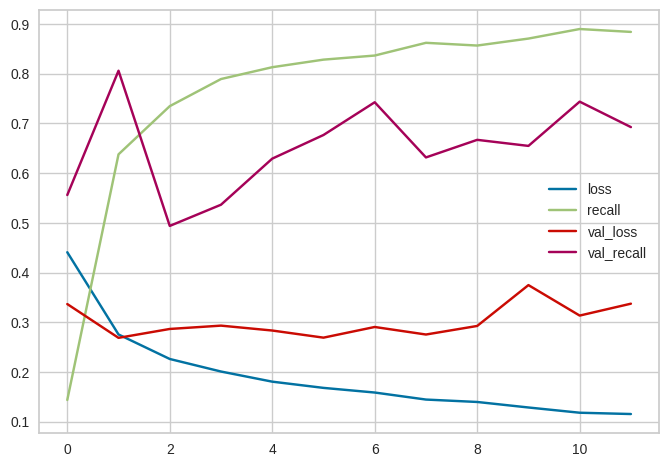

In [179]:
model_loss.plot()

In [180]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 36s 64ms/step - loss: 0.2249 - recall: 0.8869


[0.22486785054206848, 0.8869247436523438]

In [181]:
model.evaluate(X_test, y_test)

142/142 [==============================] - 9s 62ms/step - loss: 0.2688 - recall: 0.8061


[0.2687959372997284, 0.8060975670814514]

In [182]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 36s 61ms/step
[[13492  1339]
 [  371  2910]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     14831
           1       0.68      0.89      0.77      3281

    accuracy                           0.91     18112
   macro avg       0.83      0.90      0.86     18112
weighted avg       0.92      0.91      0.91     18112



In [183]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

142/142 [==============================] - 9s 55ms/step
[[3302  407]
 [ 159  661]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3709
           1       0.62      0.81      0.70       820

    accuracy                           0.88      4529
   macro avg       0.79      0.85      0.81      4529
weighted avg       0.89      0.88      0.88      4529



142/142 [==============================] - 8s 59ms/step


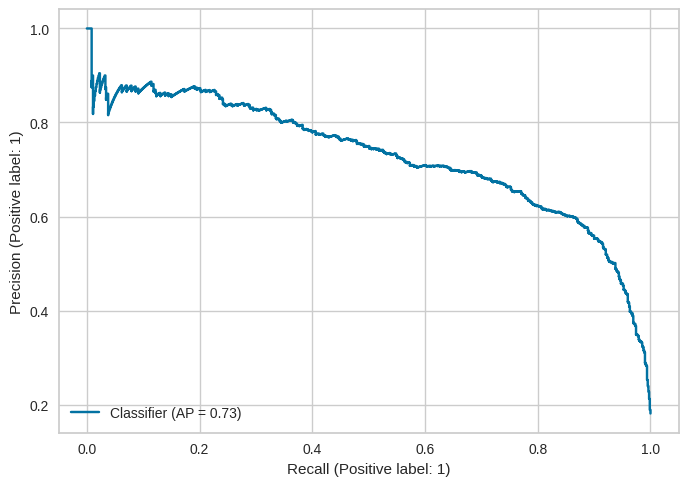

In [184]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)


In [185]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.7287674357489653

In [186]:
print(len(y_test), len(y_pred))


4529 4529


In [187]:
from sklearn.metrics import average_precision_score, f1_score, recall_score

DL_AP_Ls = average_precision_score(y_test, y_pred_proba)
DL_f1_Ls = f1_score(y_test, y_pred)
DL_rec_Ls = recall_score(y_test, y_pred)

print("Average Precision Score:", DL_AP_Ls)
print("F1 Score: ", DL_f1_Ls)
print("Recall Score: ", DL_rec_Ls)


Average Precision Score: 0.7287674357489653
F1 Score:  0.7002118644067797
Recall Score:  0.8060975609756098


In [188]:
review1 = "it fits me so well"
review = [review1 ]

In [189]:
tokens = tokenizer.texts_to_sequences(review)

In [190]:
tokens_pad = pad_sequences(tokens, maxlen=maxlen)
tokens_pad.shape

(1, 114)

In [191]:
mod_pred = model.predict(tokens_pad)
mod_pred

1/1 [==============================] - 0s 42ms/step


array([[0.0771512]], dtype=float32)

In [192]:
df_pred = pd.DataFrame(mod_pred, index=review)
df_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)

In [193]:
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: 1 if x>=0.5 else 0)

In [194]:
df_pred

Pred_Proba  Predicted_Feedbaack
it fits me so well    0.077151                    0

# GRU Model

In [195]:
model2 = Sequential()


model2.add(Embedding(input_dim=num_words,output_dim=32,input_length=maxlen))

model2.add(GRU(units=48, return_sequences=True))
model2.add(GRU(units=24, return_sequences=True))
Dense(16, activation='relu')

model2.add(GRU(units=12))
model2.add(Dropout(0.4))

model2.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.006)

model2.compile(loss="binary_crossentropy", optimizer='Adam', metrics=["Recall"])

In [196]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 114, 32)           320000    
                                                                 
 gru (GRU)                   (None, 114, 48)           11808     
                                                                 
 gru_1 (GRU)                 (None, 114, 24)           5328      
                                                                 
 gru_2 (GRU)                 (None, 12)                1368      
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 338,517
Trainable params: 338,517
Non-tr

In [197]:
model2.fit(X_train, y_train, epochs=20, batch_size=32,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/20
566/566 [==============================] - 93s 153ms/step - loss: 0.3538 - recall: 0.3974 - val_loss: 0.2635 - val_recall: 0.6915
Epoch 2/20
566/566 [==============================] - 85s 150ms/step - loss: 0.2280 - recall: 0.7385 - val_loss: 0.2590 - val_recall: 0.5695
Epoch 3/20
566/566 [==============================] - 85s 150ms/step - loss: 0.1852 - recall: 0.8059 - val_loss: 0.2708 - val_recall: 0.6512
Epoch 4/20
566/566 [==============================] - 91s 160ms/step - loss: 0.1560 - recall: 0.8473 - val_loss: 0.2863 - val_recall: 0.6976
Epoch 5/20
566/566 [==============================] - 91s 161ms/step - loss: 0.1254 - recall: 0.8857 - val_loss: 0.3326 - val_recall: 0.5927
Epoch 6/20
566/566 [==============================] - 86s 151ms/step - loss: 0.1047 - recall: 0.9080 - val_loss: 0.3742 - val_recall: 0.6463
Epoch 7/20
566/566 [==============================] - 89s 156ms/step - loss: 0.0867 - recall: 0.9305 - val_loss: 0.3871 - val_recall: 0.6598
Epoch 8/20
56

In [198]:
model_loss = pd.DataFrame(model2.history.history)
model_loss.head()

loss    recall  val_loss  val_recall
0  0.353802  0.397440  0.263452    0.691463
1  0.227956  0.738494  0.258987    0.569512
2  0.185213  0.805852  0.270842    0.651219
3  0.156018  0.847303  0.286289    0.697561
4  0.125408  0.885706  0.332573    0.592683

Training Loss vs. Validation Loss:

The training loss is decreasing over epochs, which is expected as the model learns from the training data.
The validation loss is not consistently increasing, and it shows some fluctuations but generally stays in a reasonable range. It's not diverging from the training loss.
Training Recall vs. Validation Recall:

The training recall is improving, indicating that the model is becoming better at classifying positive instances in the training data.
The validation recall initially increases and then stabilizes. Although it decreases slightly in the last epoch, it's not a clear sign of overfitting.

<Axes: >

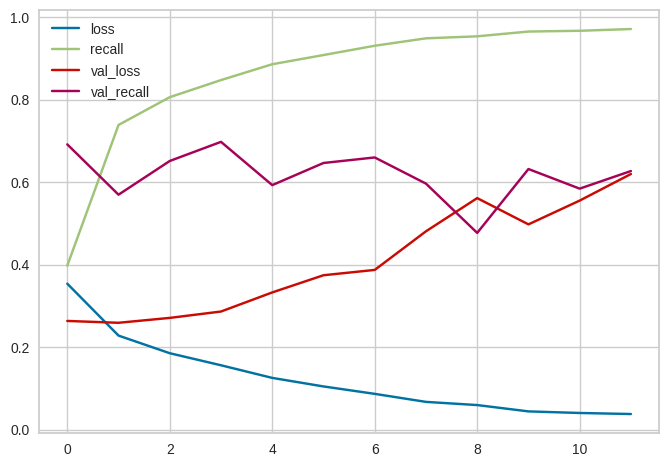

In [199]:
model_loss.plot()

In [200]:
model2.evaluate(X_train, y_train)

566/566 [==============================] - 25s 43ms/step - loss: 0.1709 - recall: 0.7406


[0.17085251212120056, 0.7406278848648071]

In [201]:
model2.evaluate(X_test, y_test)

142/142 [==============================] - 5s 35ms/step - loss: 0.2590 - recall: 0.5695


[0.25898680090904236, 0.5695121884346008]

### Model Evaluation

In [202]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model2.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 27s 44ms/step
[[14464   367]
 [  851  2430]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14831
           1       0.87      0.74      0.80      3281

    accuracy                           0.93     18112
   macro avg       0.91      0.86      0.88     18112
weighted avg       0.93      0.93      0.93     18112



In [203]:
y_pred = (model2.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

142/142 [==============================] - 7s 35ms/step
[[3564  145]
 [ 353  467]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3709
           1       0.76      0.57      0.65       820

    accuracy                           0.89      4529
   macro avg       0.84      0.77      0.79      4529
weighted avg       0.88      0.89      0.88      4529



The model performs well on both sets, achieving high precision, recall, and F1-score for both classes.
There is a slight drop in performance on the validation/test set compared to the training set, which is common and expected. However, the drop is not significant.
The accuracy on both sets is high, indicating good overall classification performance.

142/142 [==============================] - 8s 57ms/step


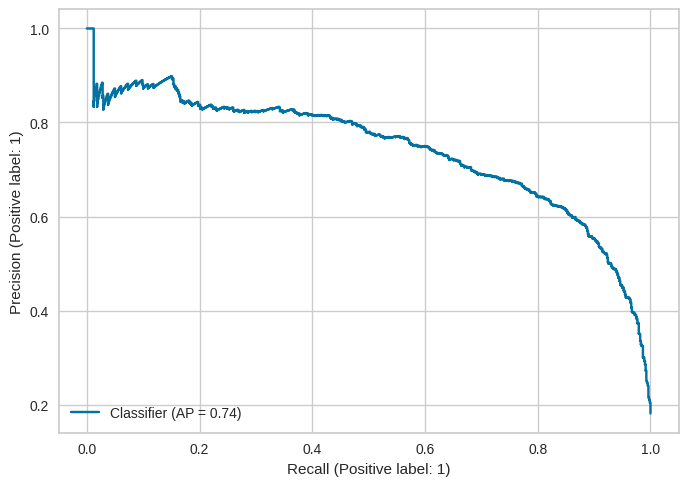

In [204]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model2.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)


In [205]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.7409902272334963

In [206]:
from sklearn.metrics import average_precision_score, f1_score, recall_score



DL_AP = average_precision_score(y_test,  y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

print("Average Precision Score: {:.4f}".format(DL_AP))
print("F1 Score: {:.4f}".format(DL_f1))
print("Recall Score: {:.4f}".format(DL_rec))

Average Precision Score: 0.7410
F1 Score: 0.6522
Recall Score: 0.5695


In [207]:
review1 = "Love this dress"
review2 = "Absolutely wonderful. silky and sexy and comfortable"
review3 = "i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!"
review4 = "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
review5 = 'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!'
review6 = 'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.'
review7 = 'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'
reviews = [review1, review2, review3, review4, review5, review6,review7]

In [208]:
tokens = tokenizer.texts_to_sequences(reviews)
tokens_pad = pad_sequences(tokens, maxlen=maxlen)
tokens_pad.shape

(7, 114)

In [209]:
mod_pred = model2.predict(tokens_pad)
mod_pred

1/1 [==============================] - 0s 71ms/step


array([[0.08416855],
       [0.00724292],
       [0.01475481],
       [0.00442365],
       [0.00589322],
       [0.18151033],
       [0.89345187]], dtype=float32)

In [210]:
df_pred = pd.DataFrame(mod_pred, index=reviews)
df_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)

In [211]:
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: 1 if x>=0.5 else 0)

In [212]:
df_pred

Pred_Proba  \
Love this dress                                       0.084169   
Absolutely wonderful. silky and sexy and comfor...    0.007243   
i initially ordered the petite small (my usual ...    0.014755   
I love, love, love this jumpsuit. it's fun, fli...    0.004424   
This shirt is very flattering to all due to the...    0.005893   
I love tracy reese dresses, but this one is not...    0.181510   
Dress runs small esp where the zipper area runs...    0.893452   

                                                    Predicted_Feedbaack  
Love this dress                                                       0  
Absolutely wonderful. silky and sexy and comfor...                    0  
i initially ordered the petite small (my usual ...                    0  
I love, love, love this jumpsuit. it's fun, fli...                    0  
This shirt is very flattering to all due to the...                    0  
I love tracy reese dresses, but this one is not...                    0  
Dress runs small esp where the zipper area runs...                    1

# `BERT Modeling`

In [213]:
pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.0 MB/s eta 0:00:00


In [214]:
import torch
import torch.nn as nn
from transformers import AutoModel, BertTokenizerFast
import tensorflow_hub as hub
import warnings

warnings.filterwarnings('ignore')


In [215]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [216]:
strategy = tf.distribute.TPUStrategy(resolver)

# To take advantage of the speed of TPU cores, we assign the 8 allocated TPU cores to the strategy variable.

In [217]:
import tensorflow as tf
print("Tensorflow version \t\t:" + tf.__version__)

print("Available devices:")
for i, device in enumerate(tf.config.list_logical_devices()):
    print("%d) %s" % (i, device))

Tensorflow version 		:2.12.0
Available devices:
0) LogicalDevice(name='/device:CPU:0', device_type='CPU')
1) LogicalDevice(name='/job:worker/replica:0/task:0/device:CPU:0', device_type='CPU')
2) LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU_SYSTEM:0', device_type='TPU_SYSTEM')
3) LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU')
4) LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU')
5) LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')
6) LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU')
7) LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU')
8) LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU')
9) LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU')
10) LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')
11) LogicalDevice(n

### Read Data

In [218]:
import pandas as pd


In [219]:
df_original = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)
df_bert = df_original.copy()
print('Shape of DataFrame: ',df_bert.shape,'\n')
df_bert

Shape of DataFrame:  (23486, 10) 



Clothing ID  Age                                              Title  \
0              767   33                                                NaN   
1             1080   34                                                NaN   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 10 columns]

parameter asing

In [220]:
batch_size = 8 * strategy.num_replicas_in_sync # Gobal batch size.
print('batch_size           :', batch_size)

random_state = 42

batch_size           : 64


In [221]:
df_bert = df_bert[["Review Text","Recommended IND"]]
df_bert.head()

Review Text  Recommended IND
0  Absolutely wonderful - silky and sexy and comf...                1
1  Love this dress!  it's sooo pretty.  i happene...                1
2  I had such high hopes for this dress and reall...                0
3  I love, love, love this jumpsuit. it's fun, fl...                1
4  This shirt is very flattering to all due to th...                1

In [222]:
df_bert.isna().sum()

Review Text        845
Recommended IND      0
dtype: int64

In [223]:
df_bert.rename(columns = {'Review Text':'Review', 'Recommended IND':'Recommended'}, inplace = True)

In [224]:
df_bert = df_bert.dropna(subset = ['Review'], axis = 0)
df_bert = df_bert.reset_index(drop = True)

In [225]:
df_bert.isna().sum()

Review         0
Recommended    0
dtype: int64

In [226]:
df_bert.shape

(22641, 2)

In [227]:
X = df_bert['Review'].values
y = df_bert['Recommended'].map({0:1, 1:0}).values

### Tokenization

In [228]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "This fit well, but the top was very see through. this never would have worked for me. i

In [229]:

from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []

for sent in X:
    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sent)))
    num_of_sent_tokens.append(len(tokens))

print('Max sentence length: ', max(num_of_sent_tokens))


(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)bert-base-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)base-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

(…)rt-base-uncased/resolve/main/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Max sentence length:  162


In [230]:
import numpy as np
np.array(num_of_sent_tokens).mean()

76.75659202332052

In [231]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

1.0

### Train test split

In [232]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.1, stratify=y, random_state=42)

### Fixing token counts of all documents

In [233]:
# Tokenize all documents, ensuring a fixed length of 162 tokens
all_sentence_tokens = tokenizer(
    list(X
    ),
    max_length=162,
    truncation=True,
    padding='max_length',
    add_special_tokens=True
)

# Access the input_ids, attention_mask, etc., if needed
input_ids = all_sentence_tokens['input_ids']
print('the input ', input_ids)
attention_mask = all_sentence_tokens['attention_mask']
print('the attention_mask ', attention_mask)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Transformation Vectors to Matrices

In [234]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [235]:
Xids_train, Xmask_train = transformation(X_train)

Xids_test, Xmask_test = transformation(X_test)

In [236]:
Xids_train

array([[ 101, 2025, 4257, ...,    0,    0,    0],
       [ 101, 1045, 2001, ...,    0,    0,    0],
       [ 101, 1045, 2387, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 2307, 4906, ...,    0,    0,    0],
       [ 101, 2043, 1045, ...,    0,    0,    0]])

In [237]:
print("Xids_train shapes:")
for ids in Xids_train:
    print(ids.shape)

print("Xmask_train shapes:")
for mask in Xmask_train:
    print(mask.shape)

print("Xids_test shape  :", Xids_test.shape)
print("Xmask_test shape :", Xmask_test.shape)


Streaming output truncated to the last 5000 lines.
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162,)
(162

In [238]:
labels_train = y_train.reshape(-1, 1)

labels_train

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [239]:
labels_test = y_test.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Transformation Matrix to Tensorflow tensor

In [240]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [241]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [242]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
   return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [243]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [244]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [245]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [246]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.9 MB/s eta 0:00:00


In [247]:

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

### Creating optimization

In [248]:
from official.nlp import optimization
epochs = 3
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [249]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

638
63


### Creating Model with TPU

In [250]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model3 = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model3.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]

    x = Dense(64, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x)
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)


In [251]:
with strategy.scope():

  optimizer = optimizer
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [252]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

### Model Fiting

In [253]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/3
319/319 [==============================] - 214s 336ms/step - loss: 0.5667 - recall: 0.8030 - val_loss: 0.4319 - val_recall: 0.8488
Epoch 2/3
319/319 [==============================] - 43s 135ms/step - loss: 0.4372 - recall: 0.8569 - val_loss: 0.2997 - val_recall: 0.7073
Epoch 3/3
319/319 [==============================] - 43s 135ms/step - loss: 0.3719 - recall: 0.8775 - val_loss: 0.4356 - val_recall: 0.8220


### Model evaluation

In [254]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

loss    recall  val_loss  val_recall
0  0.566654  0.803034  0.431875    0.848781
1  0.437174  0.856949  0.299730    0.707317
2  0.371858  0.877540  0.435563    0.821951

<Axes: >

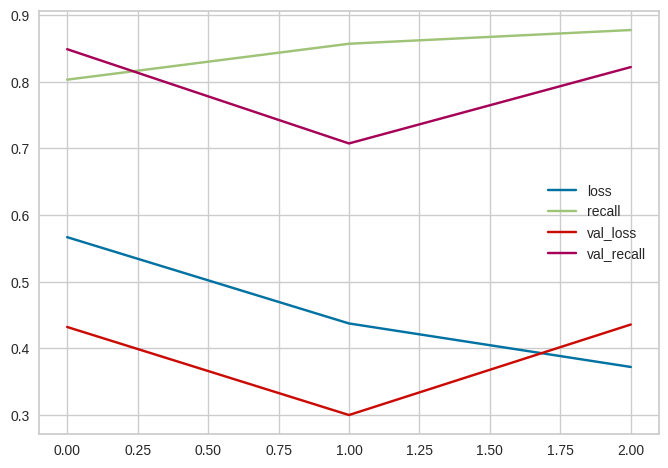

In [255]:
model_loss.plot()

In [256]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test, y_pred))

36/36 [==============================] - 19s 313ms/step
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1855
           1       0.78      0.82      0.80       410

    accuracy                           0.92      2265
   macro avg       0.87      0.88      0.88      2265
weighted avg       0.93      0.92      0.93      2265



In [257]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train, y_train_pred))

319/319 [==============================] - 18s 51ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16685
           1       0.89      0.89      0.89      3691

    accuracy                           0.96     20376
   macro avg       0.94      0.94      0.94     20376
weighted avg       0.96      0.96      0.96     20376



36/36 [==============================] - 3s 38ms/step


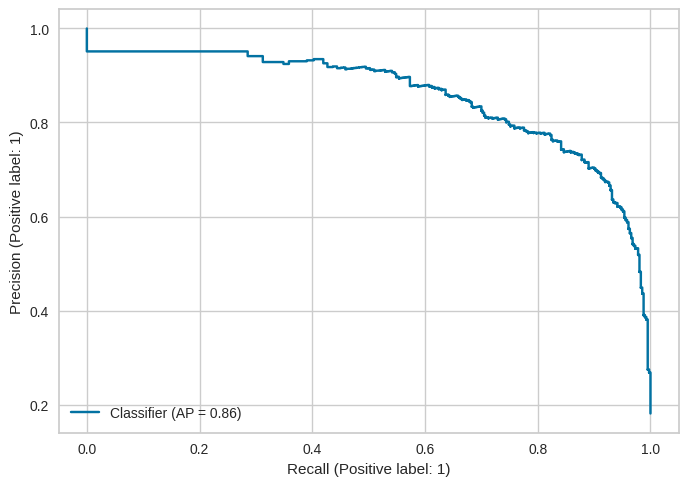

In [258]:
from sklearn.metrics import PrecisionRecallDisplay
y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [259]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_pred_proba)

0.8578676601774599

In [260]:
from sklearn.metrics import average_precision_score, f1_score, recall_score


BERT_AP = average_precision_score(y_test,  y_pred_proba)
BERT_f1 = f1_score(y_test, y_pred)
BERT_rec = recall_score(y_test, y_pred)

print("BERT Average Precision:", BERT_AP)
print("BERT F1 Score:", BERT_f1)
print("BERT Recall:", BERT_rec)


BERT Average Precision: 0.8578676601774599
BERT F1 Score: 0.7985781990521327
BERT Recall: 0.8219512195121951


# model with weighted

In [261]:
 def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model4 = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model4.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]

    x = Dense(64, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x)
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)



In [262]:
from official.nlp import optimization
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [263]:
with strategy.scope():

  optimizer = optimizer
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model4 = create_model()
  model4.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [264]:
import pandas as pd
pd.Series(y).value_counts(normalize=True)

0    0.818868
1    0.181132
dtype: float64

In [265]:
weights = {1:0.18, 0:0.81}

In [266]:
model4.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs, class_weight=weights)

Epoch 1/3
319/319 [==============================] - 184s 315ms/step - loss: 0.4164 - recall_1: 0.7776 - val_loss: 0.2990 - val_recall_1: 0.5537
Epoch 2/3
319/319 [==============================] - 43s 136ms/step - loss: 0.3193 - recall_1: 0.7938 - val_loss: 0.3414 - val_recall_1: 0.6780
Epoch 3/3
319/319 [==============================] - 44s 137ms/step - loss: 0.2682 - recall_1: 0.8209 - val_loss: 0.4105 - val_recall_1: 0.7488


In [267]:
y_pred = model4.predict(val_ds) >= 0.5


print(classification_report(y_test, y_pred))

36/36 [==============================] - 19s 315ms/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1855
           1       0.81      0.75      0.78       410

    accuracy                           0.92      2265
   macro avg       0.88      0.86      0.87      2265
weighted avg       0.92      0.92      0.92      2265



In [268]:
y_train_pred = model4.predict(train_ds) >= 0.5


print(classification_report(y_train, y_train_pred))

319/319 [==============================] - 18s 51ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     16685
           1       0.93      0.82      0.87      3691

    accuracy                           0.96     20376
   macro avg       0.94      0.90      0.92     20376
weighted avg       0.95      0.96      0.95     20376



In [269]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test, y_pred_proba)

36/36 [==============================] - 3s 38ms/step


0.8578676601774599

In [270]:
from sklearn.metrics import average_precision_score, f1_score, recall_score

BERT_with_weighted_AP = average_precision_score(y_test,  y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test, y_pred)
BERT_with_weighted_rec = recall_score(y_test, y_pred)

print("BERT with Weighted Average Precision:", BERT_with_weighted_AP)
print("BERT with Weighted F1 Score:", BERT_with_weighted_f1)
print("BERT with Weighted Recall:", BERT_with_weighted_rec)


BERT with Weighted Average Precision: 0.8578676601774599
BERT with Weighted F1 Score: 0.7791878172588832
BERT with Weighted Recall: 0.748780487804878


### Compare Models F1 Scores, Recall Scores and Average Precision Score

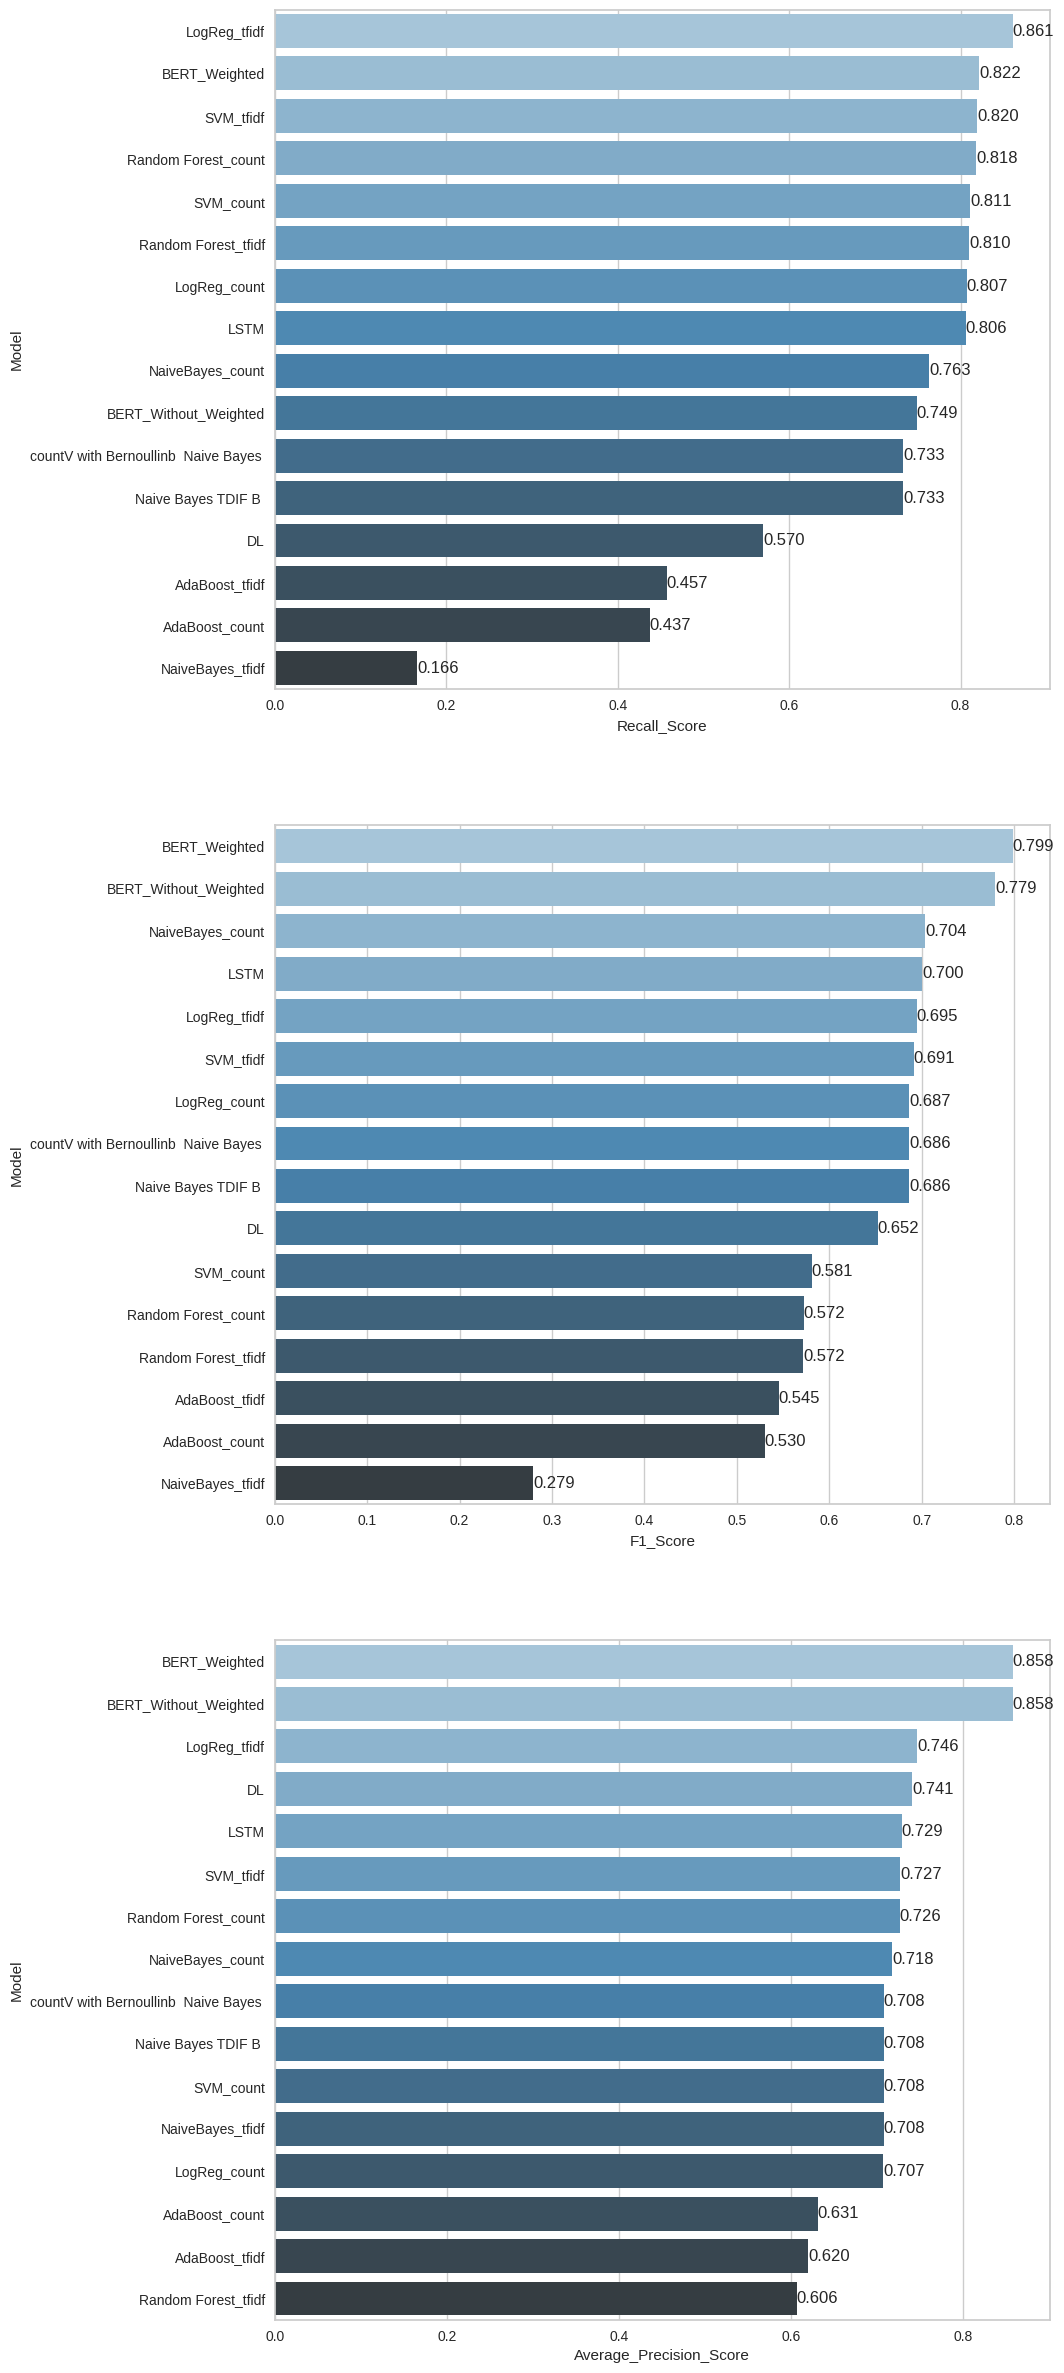

In [271]:
from sklearn.metrics import average_precision_score, f1_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#

# Create DataFrame
compare = pd.DataFrame({
    "Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
              "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
              "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "LSTM", "BERT_Weighted", "BERT_Without_Weighted",
              "countV with Bernoullinb  Naive Bayes ", "Naive Bayes TDIF B "],
    "F1_Score": [nb_countt_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, nb_TF_IDF_f1,
                 log_tf_idf_f1, svc_tf_idf_f1, rf_tf_idf_f1, ada_tf_idf_f1, DL_f1, DL_f1_Ls, BERT_f1,
                 BERT_with_weighted_f1, nbberno_co_f1, nbberno_tfidf_f1],
    "Recall_Score": [nnb_count_rec, log_count_rec, svc_count_rec, rf_count_rec,
                     ada_count_rec, nb_TF_IDF_rec, log_tf_idf_rec, svc_tf_idf_rec,
                     rf_tf_idf_rec, ada_tf_idf_rec, DL_rec, DL_rec_Ls, BERT_rec,
                     BERT_with_weighted_rec, nbberno_co_rec, nbberno_tfidf_rec],
     "Average_Precision_Score": [nb_count_AP, log_AP, nbberno_cot_AP, rf_count_AP, ada_count_AP, nb_TF_IDFt_AP,
                                log_tf_idf_AP, svc_tf_idf_AP, rf_tf_idf_AP, ada_tf_idf_AP, DL_AP, DL_AP_Ls, BERT_AP,
                                BERT_with_weighted_AP, nbberno_cot_AP, nbberno_tfidf_AP]
})

# Plotting
plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();




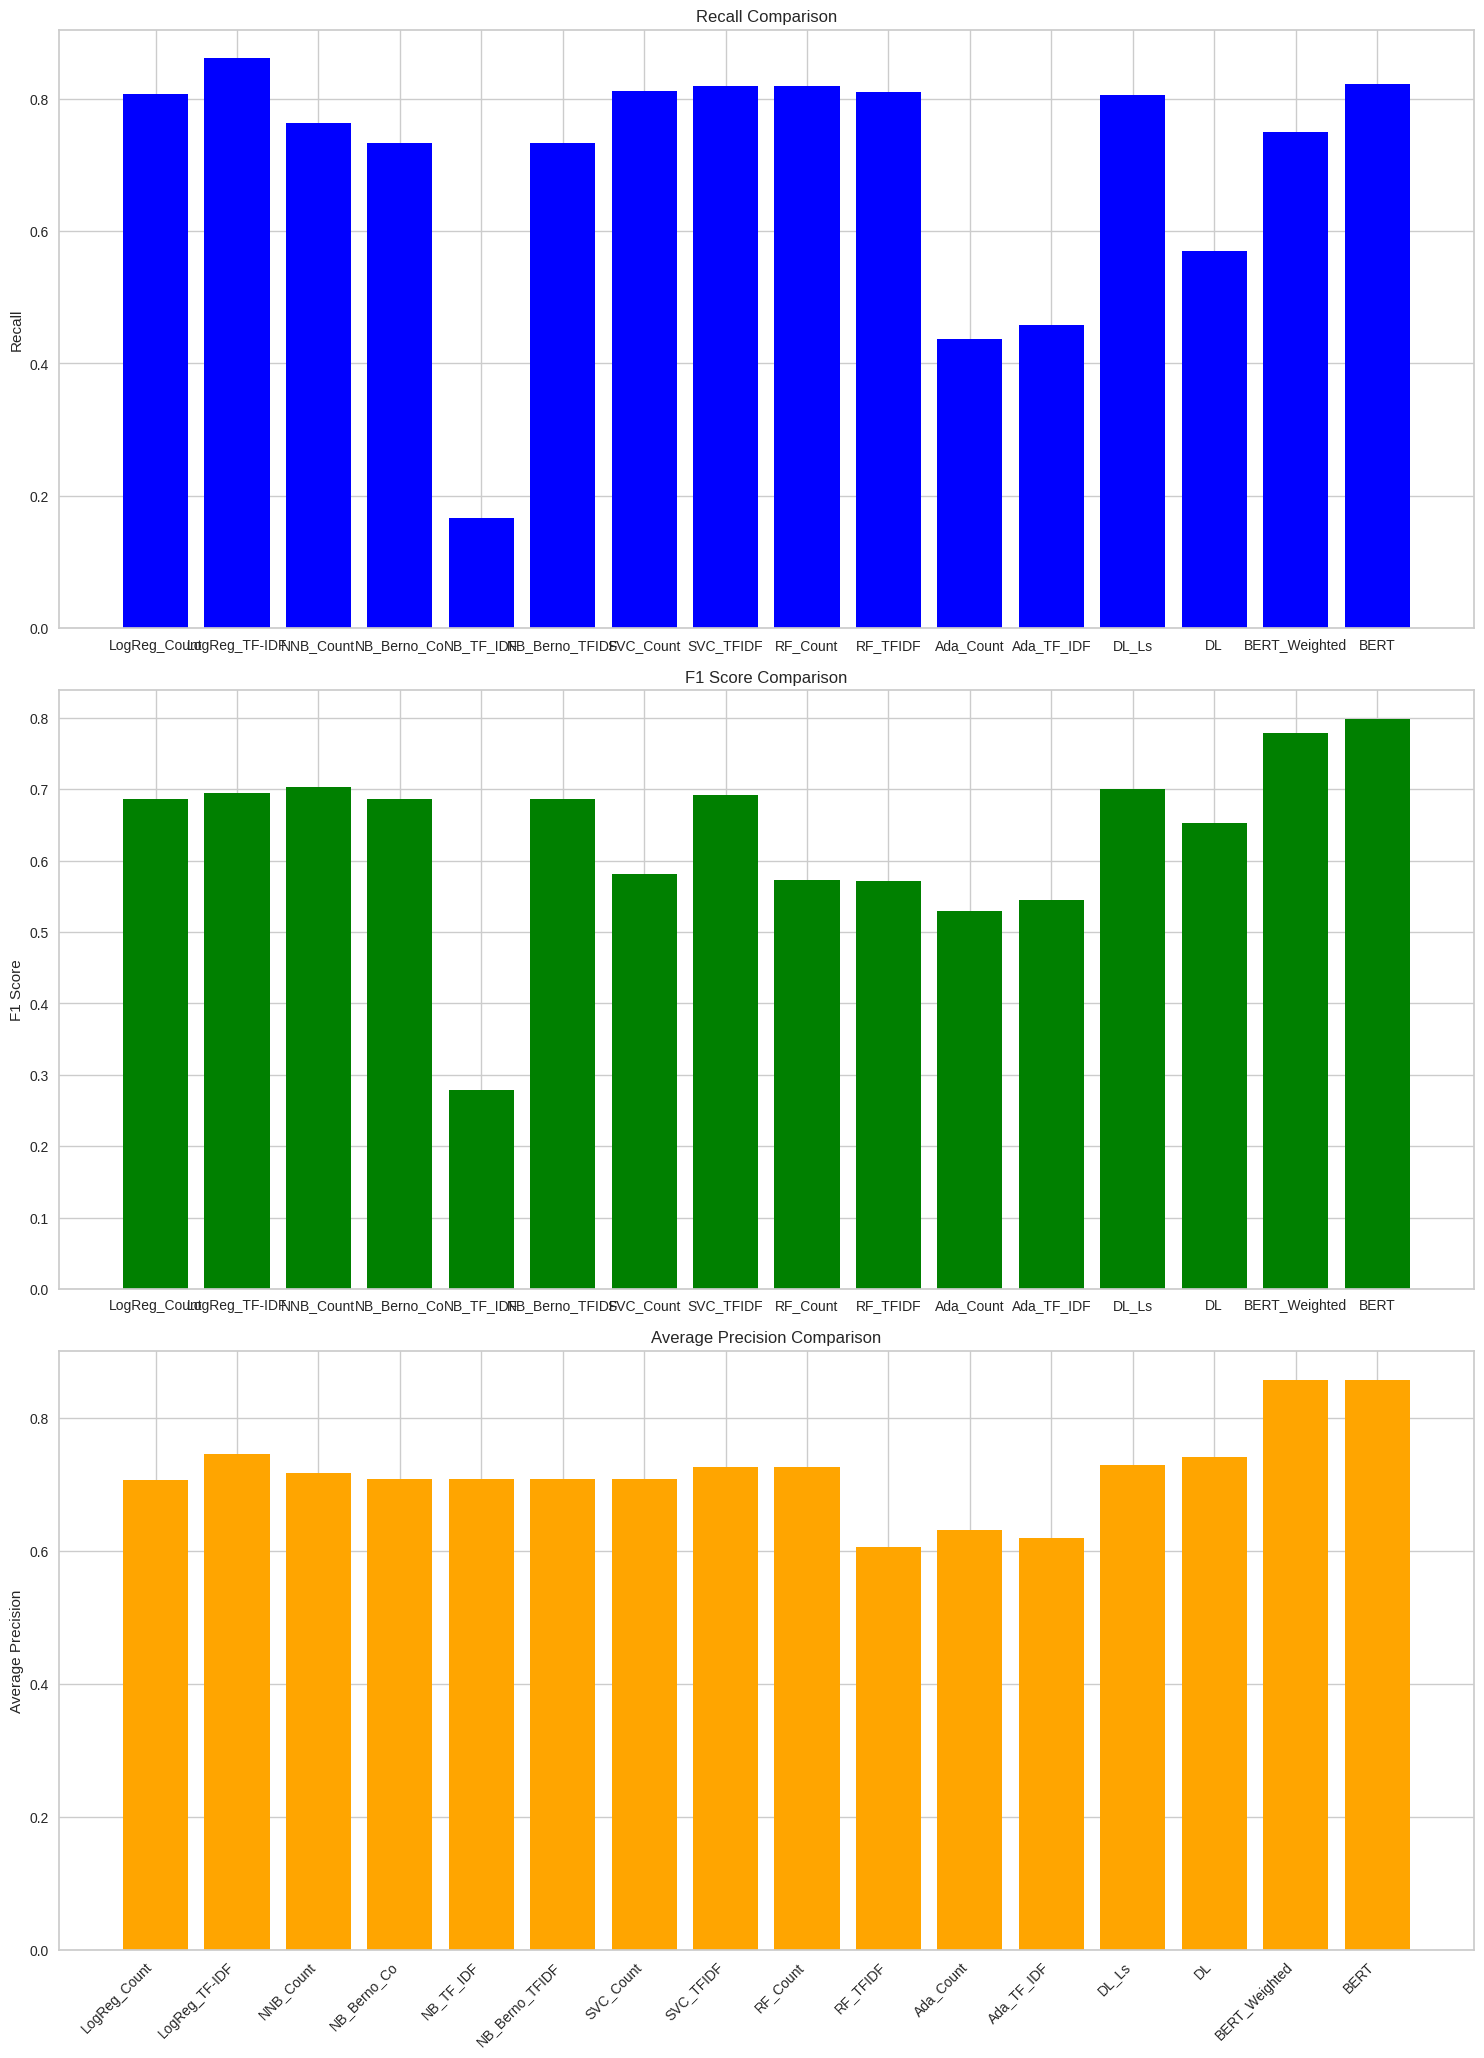

In [272]:
import matplotlib.pyplot as plt
import numpy as np

# Results data (replace with your actual values)
models = [
    "LogReg_Count", "LogReg_TF-IDF", "NNB_Count", "NB_Berno_Co", "NB_TF_IDF",
    "NB_Berno_TFIDF", "SVC_Count", "SVC_TFIDF", "RF_Count", "RF_TFIDF",
    "Ada_Count", "Ada_TF_IDF", "DL_Ls", "DL", "BERT_Weighted", "BERT"
]

recall_values = [
    log_count_rec, log_tf_idf_rec, nnb_count_rec, nbberno_co_rec, nb_TF_IDF_rec,
    nbberno_tfidf_rec, svc_count_rec, svc_tf_idf_rec, rf_count_rec, rf_tf_idf_rec,
    ada_count_rec, ada_tf_idf_rec, DL_rec_Ls, DL_rec, BERT_with_weighted_rec, BERT_rec
]

f1_values = [
    log_count_f1, log_tf_idf_f1, nb_countt_f1, nbberno_co_f1, nb_TF_IDF_f1,
    nbberno_tfidf_f1, svc_count_f1, svc_tf_idf_f1, rf_count_f1, rf_tf_idf_f1,
    ada_count_f1, ada_tf_idf_f1, DL_f1_Ls, DL_f1, BERT_with_weighted_f1, BERT_f1
]

ap_values = [
    log_AP, log_tf_idf_AP, nb_count_AP, nbberno_cot_AP, nb_TF_IDFt_AP,
    nbberno_tfidf_AP, nbberno_cot_AP, svc_tf_idf_AP, rf_count_AP, rf_tf_idf_AP,
    ada_count_AP, ada_tf_idf_AP, DL_AP_Ls, DL_AP, BERT_with_weighted_AP, BERT_AP
]

# Flatten potentially nested structures
flatten = lambda l: [item for sublist in l for item in (sublist if isinstance(sublist, (list, tuple)) else [sublist])]

# Ensure all values are numerical
recall_values = np.asarray(flatten(recall_values), dtype=np.float32)
f1_values = np.asarray(flatten(f1_values), dtype=np.float32)
ap_values = np.asarray(flatten(ap_values), dtype=np.float32)

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))

# Recall comparison
axes[0].bar(models, recall_values, color='blue')
axes[0].set_title('Recall Comparison')
axes[0].set_ylabel('Recall')

# F1 Score comparison
axes[1].bar(models, f1_values, color='green')
axes[1].set_title('F1 Score Comparison')
axes[1].set_ylabel('F1 Score')

# Average Precision comparison
axes[2].bar(models, ap_values, color='orange')
axes[2].set_title('Average Precision Comparison')
axes[2].set_ylabel('Average Precision')

plt.tight_layout()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### Conclusion

if i chose the best one i will use bert with Weighted is good in both f1 and AP and it is the sacound one in recall but the log tfidf is good but in other matric is not good there other conseder as better


Based on the provided performance metrics, let's draw some conclusions:

Best Performing Models:

Weighted BERT: Achieves high scores across all metrics, including Weighted Average Precision, Weighted F1 Score, and Weighted Recall.
SVC_TFIDF: Shows strong performance in terms of Weighted Average Precision, F1 Score, and Recall.
Random Forest TFIDF: Also performs well with high scores in Weighted Average Precision and Recall.
Notable Performers:

LogReg TFIDF: Demonstrates high Weighted Average Precision and F1 Score.
LMST (assuming it's a specific model): Performs well in terms of Average Precision and F1 Score.
Models with Room for Improvement:

DL GRU: While achieving a decent Average Precision, it seems to have lower F1 Score and Recall compared to the top performers.
NBMulti_TFIDF MODEL: Shows lower values for Recall and F1 Score.
NBBerno_TFIDF MODEL: Also has room for improvement, especially in terms of F1 Score.
Important Considerations:

Weighted Metrics: Given that the evaluation includes weighted metrics, it suggests that the class distribution in the dataset are imbalanced. The models should be evaluated considering the specific needs and priorities related to precision, recall, and F1 Score.
Overall Recommendation:



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___